# Import Libraries

In [5]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import simplekml
from os import listdir
from os.path import isfile, join
import cv2
import numpy
from PIL import Image
import numpy as np
import os
from matplotlib import pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms
import imageio
from skimage import img_as_ubyte
##################
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
from PIL import ImageTk,Image
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, 
NavigationToolbar2Tk)
import skimage
from skimage import data, draw, io
import tkinter as tk
import tkinter.filedialog as fd
from scipy import ndimage as nd
import matplotlib.colors
from matplotlib import pyplot
from  matplotlib import pyplot as plt
import matplotlib as mpl
import cv2
from os import listdir
from os.path import isfile, join
import numpy
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pylab as plt
import os
from PIL import Image
import csv
from itertools import zip_longest
import matplotlib.colors as colors
import pandas as pd
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import linregress
import rasterio
import matplotlib.colors as colors
import matplotlib.pyplot as pyplot
import matplotlib.ticker as ticker
import cv2
import glob
from skimage import exposure
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import smtplib
from email.message import EmailMessage
import time
from skimage import io, feature
from scipy import ndimage
import numpy as np
from skimage.registration import phase_cross_correlation
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, img_as_float, color, exposure
from skimage.restoration import unwrap_phase
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cmocean
from skimage.registration import optical_flow_tvl1, optical_flow_ilk
from skimage.color import hsv2rgb
from skimage.color import rgb2gray
from skimage.exposure import match_histograms
from scipy.ndimage import fourier_shift
from skimage import img_as_ubyte
############33333
import sys
from glob import glob
from osgeo import ogr, gdal
from osgeo import gdalconst
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import seaborn as sns
import geopandas as gpd
#import pycrs
import fiona
from fiona.crs import from_epsg
from shapely.geometry import box
from shapely.geometry import Point
import shapely.geometry as geoms
import rasterio as rio
from rasterio.plot import show
import rasterio.warp
import rasterio.shutil
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import plotting_extent
from rasterio.plot import show_hist
from rasterio.mask import mask
from rasterio.merge import merge
from rasterio import Affine, MemoryFile
from rasterio.enums import Resampling
from rasterio import plot
import rasterstats as rs
#import georasters as gr
#from rastertodataframe import raster_to_dataframe
import earthpy.spatial as es
import earthpy.plot as ep
import earthpy as et
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
import cmocean
from os import listdir
from os.path import isfile, join
import os
import numpy
from pystackreg import StackReg
from skimage.color import rgba2rgb
from PIL import Image as imo
from scipy.ndimage import shift
from tkinter import * 
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, 
    NavigationToolbar2Tk)   

# Prepare Mask file

 The aim of this step is to define Area of interest using any GIS software as follow:
 Option One:
1. Choose your Area of interest when downloading the planet lab imagery using one of the files has extension "BGRN_DN_udm_clip.tif"

Use the above mask file below on line 17 with rasterio. open("mask")

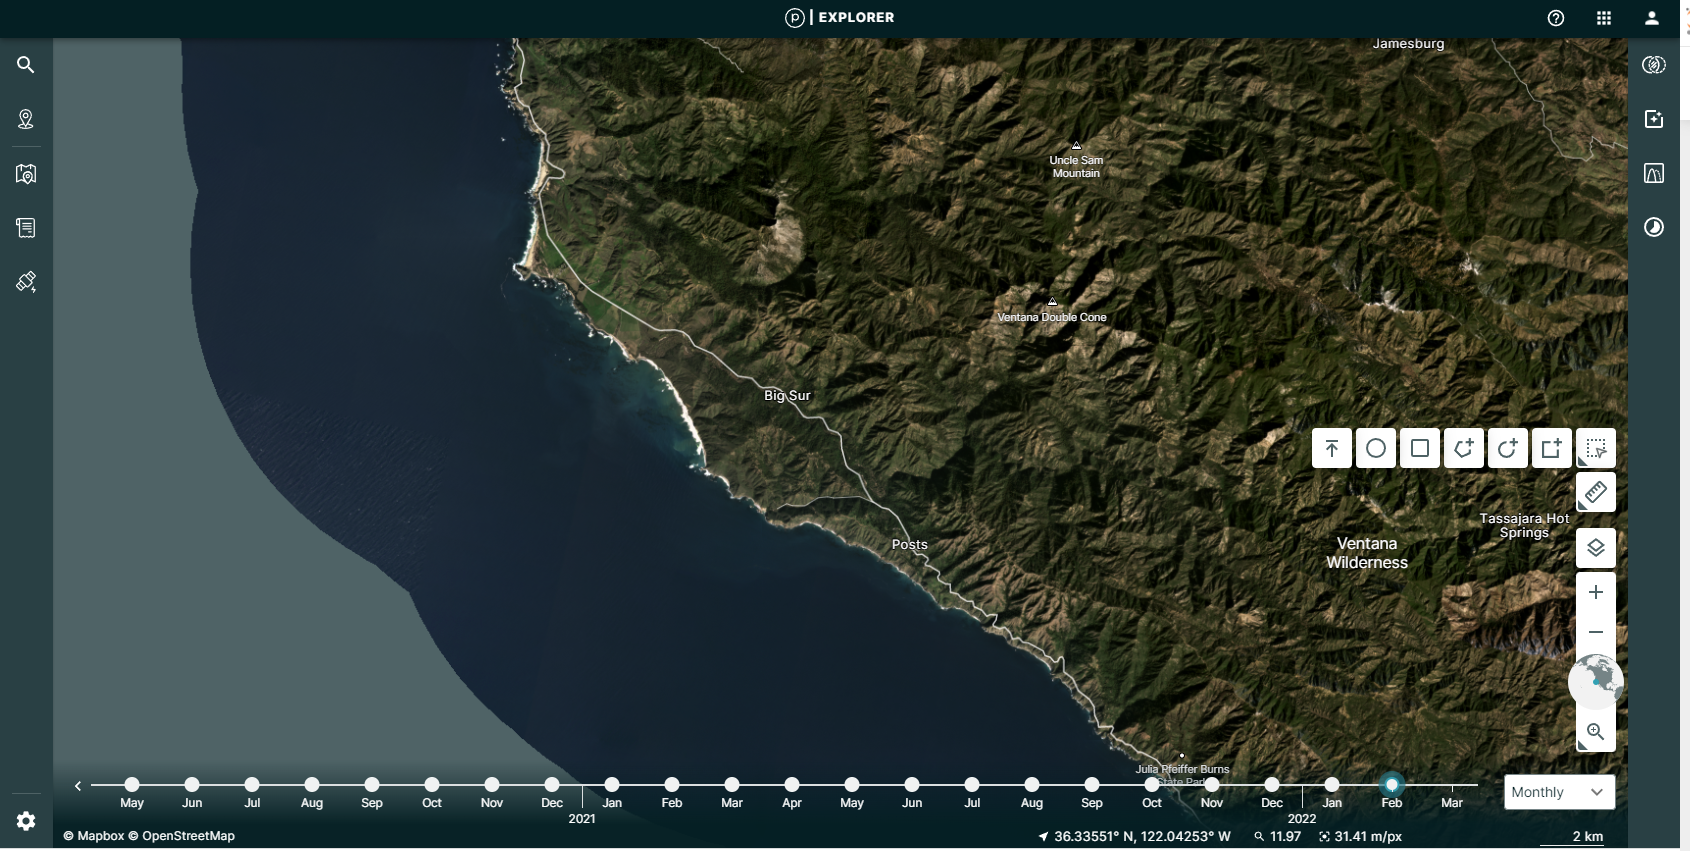

 Option 2: Draw your Area of Interest manually using polygon tool in any GIS software such as Global Mapped then save the polygon as raster Geotiff
1. Open of the downloaded orthorectified planet lab images with the extension "BGRN_SR_clip.tif"

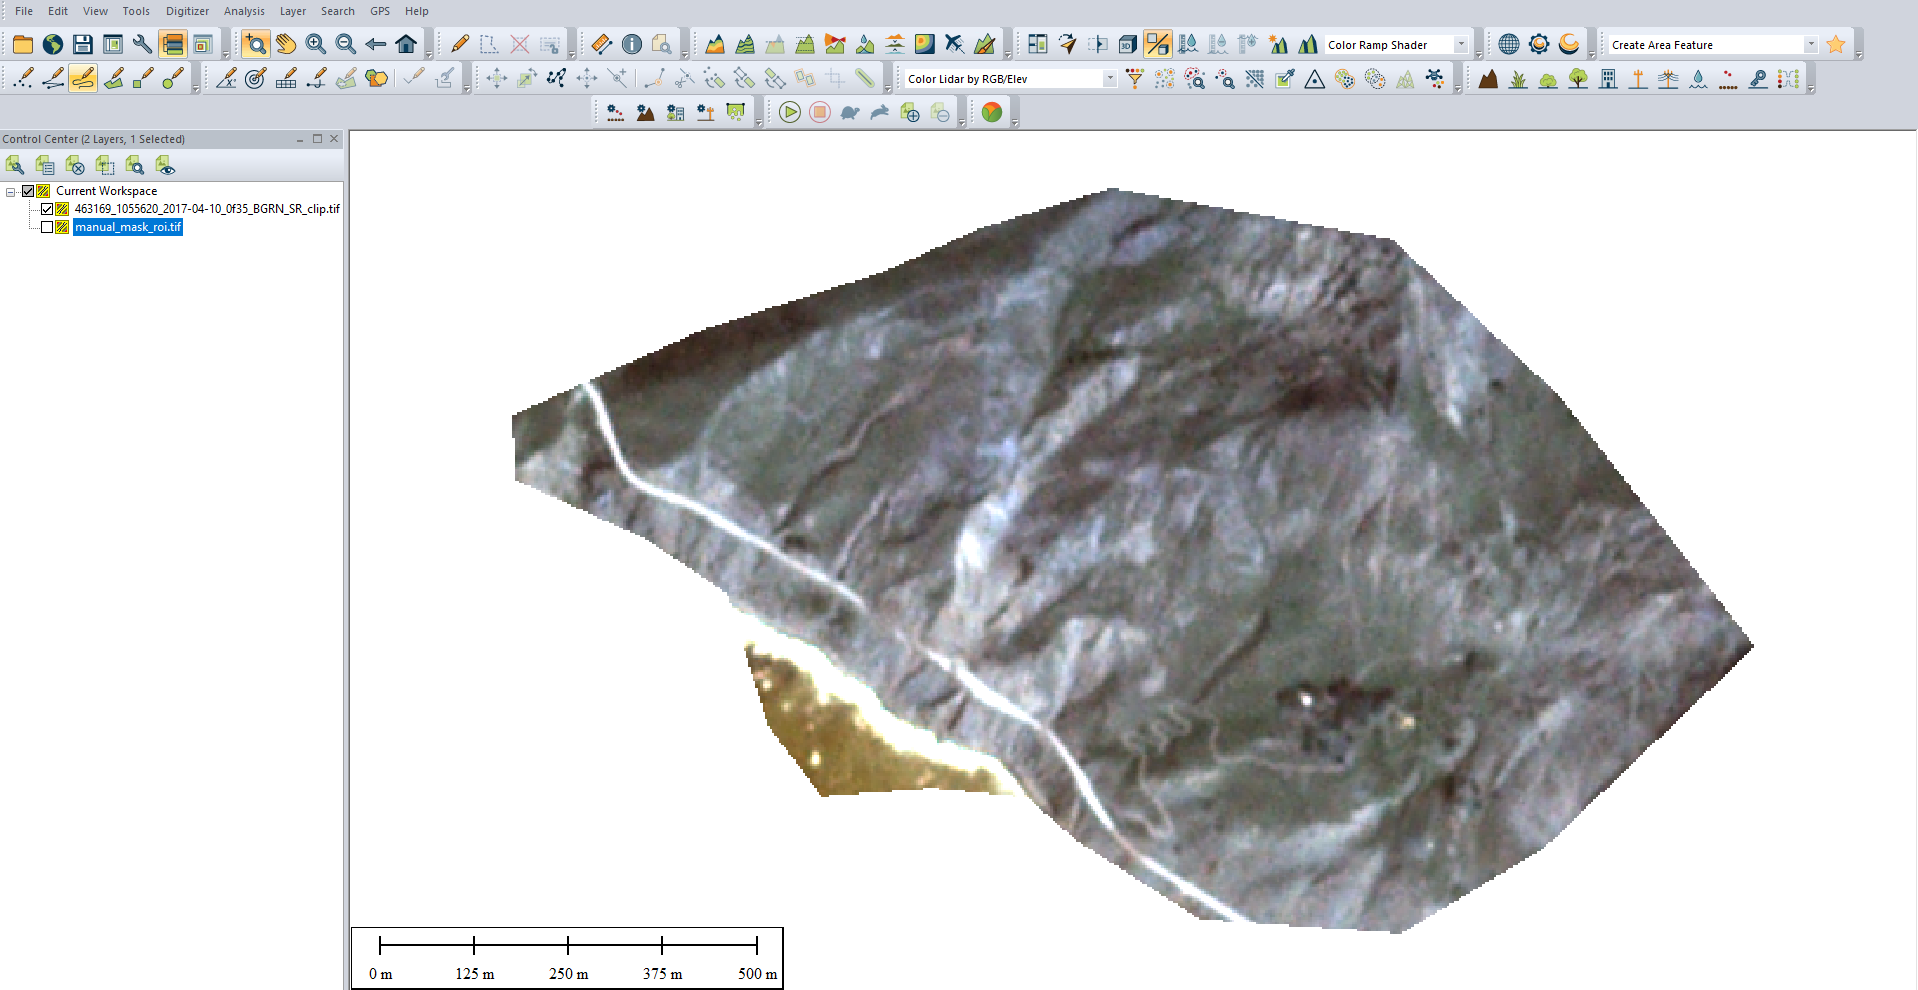

2. draw a filled polygon with black color

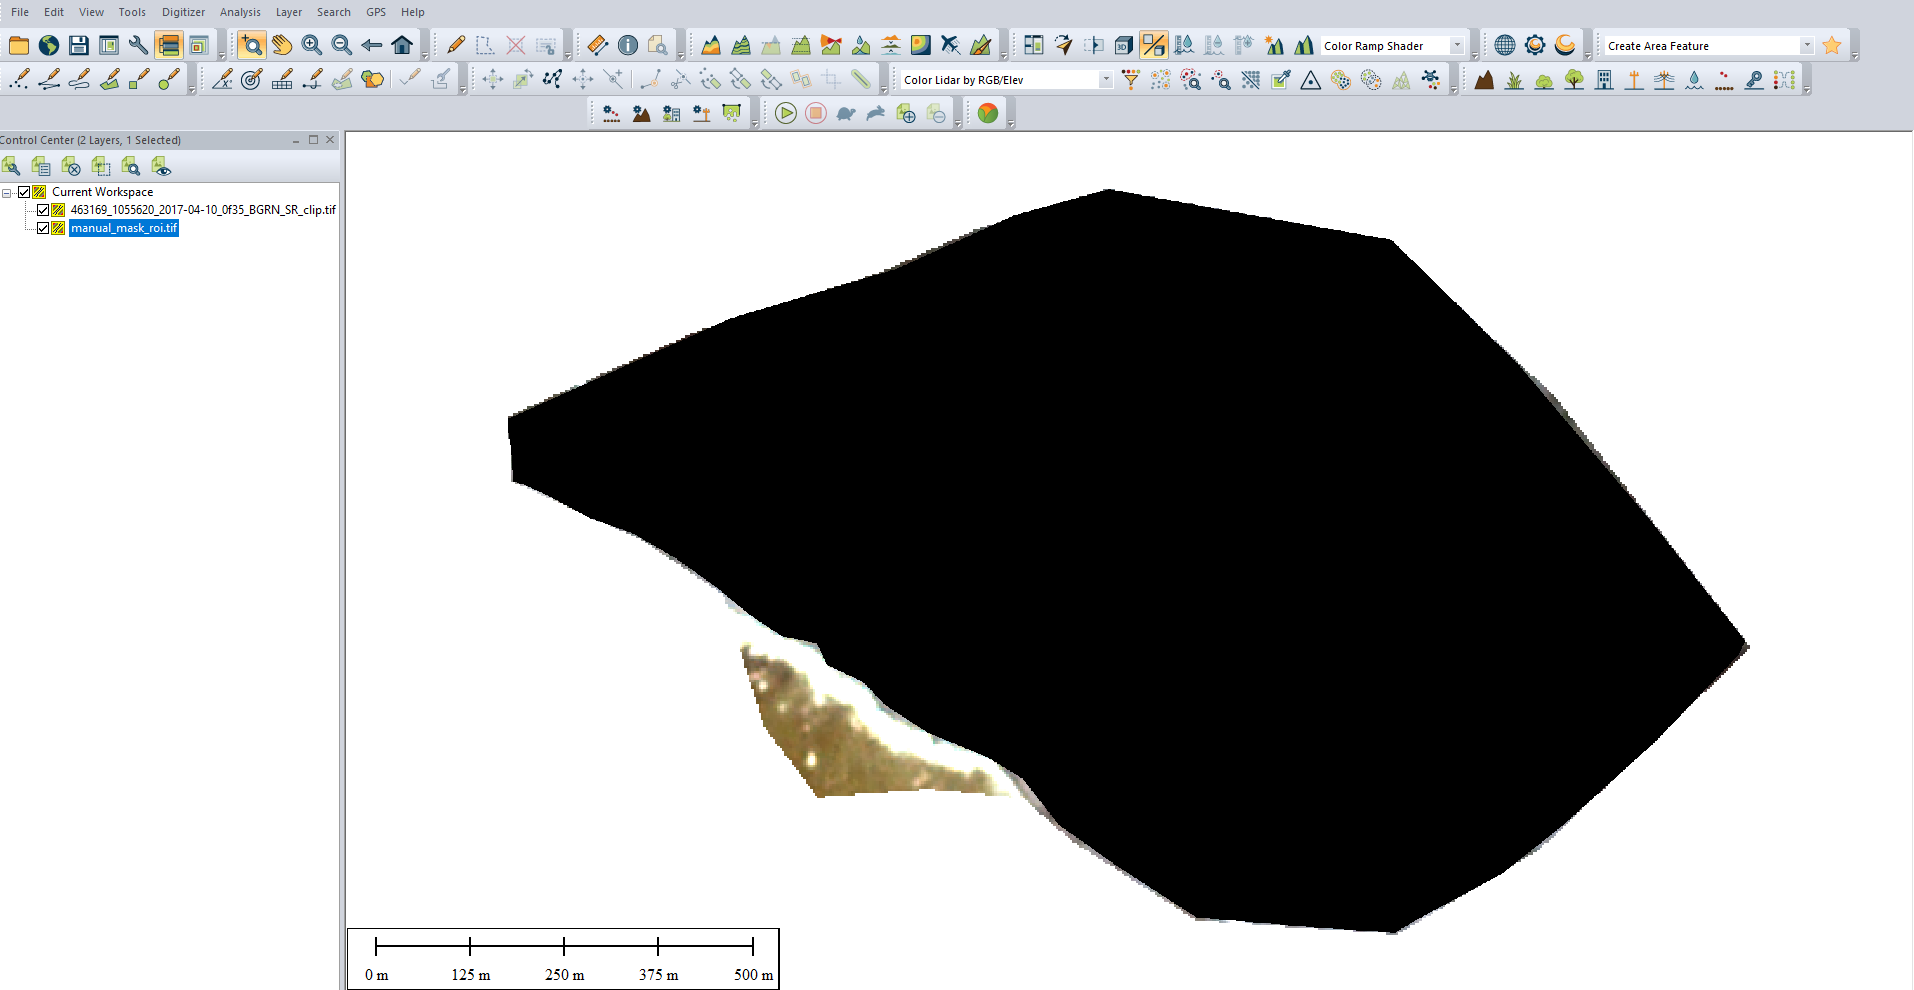

3. Export the polygon as raster Geotif using original Planet lab Geocordinate extent

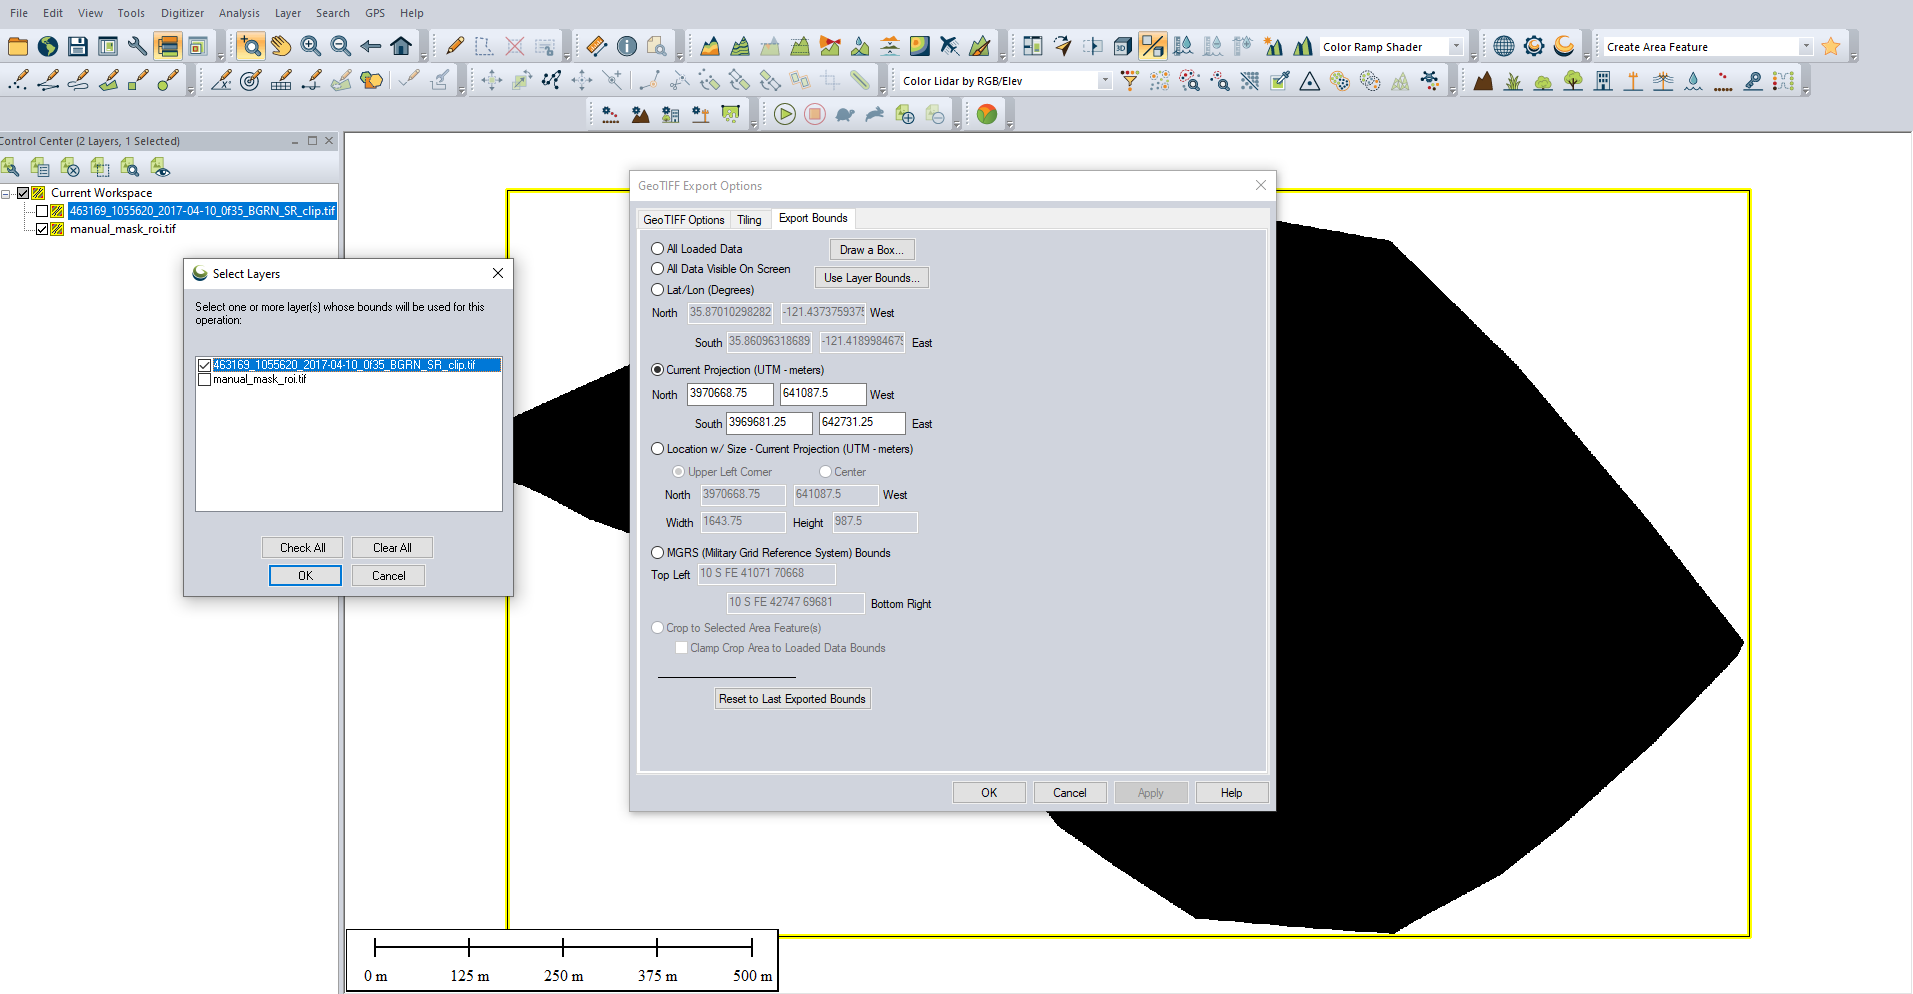

Note: if you are using Arcmap you need to draw the polygon then rasterize the filled polygon with same spatial resolution as the planet lab 3.125 by 3.125




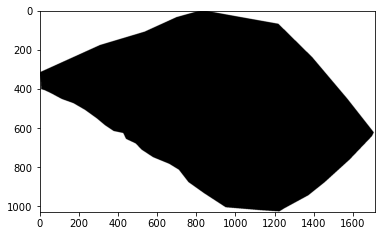

In [6]:
import rasterio
import numpy as np
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
import cv2
import imageio

def pct_clip(array,pct=[2,98]):
    array_min, array_max = np.nanpercentile(array,pct[0]), np.nanpercentile(array,pct[1])
    clip = (array - array_min) / (array_max - array_min)
    clip[clip>1]=1
    clip[clip<0]=0
    return clip

with rasterio.open("manual_mask_roi.tif") as src:
    with rasterio.open(
            'RGB_Temp_mask1.tif', 'w+',
            driver='GTiff',
            dtype= rasterio.float32,
            count=3,
            crs = src.crs,
            width=src.width,
            height=src.height,
            transform=src.transform,
        ) as dst:
        V = pct_clip(src.read(1))
        dst.write(V,1)
        V = pct_clip(src.read(1))
        dst.write(V,2)
        V = pct_clip(src.read(1))
        dst.write(V,2)
        
        def normalize(array):
            array_min, array_max = array.min(), array.max()
            return (array - array_min) / (array_max - array_min)

        # Convert to numpy arrays

        red = src.read(1)
        green = src.read(1)
        blue = src.read(1)

        # Normalize band DN
        red=exposure.rescale_intensity(red, out_range=(0, 255)).astype(np.uint8)
        green=exposure.rescale_intensity(green, out_range=(0, 255)).astype(np.uint8)
        blue=exposure.rescale_intensity(blue, out_range=(0, 255)).astype(np.uint8)
        r = normalize(red)
        g = normalize(green)
        b = normalize(blue)


        # Stack bands
        rgb = np.dstack((r, g, b))
        
        rgb=exposure.rescale_intensity(rgb, out_range=(0, 255)).astype(np.uint8)
        
        imageio.imwrite('masks\mask_manual.jpg', rgb)

        # View the color composite
        #plt.imshow(r)
        
plt.imshow(rgb)

# Writing Functions for the GUI Program

In [7]:
#Function to import raw images
def getFolderPath():
    folder_selected = filedialog.askdirectory()
    folderPath.set(folder_selected)

#Function to perform Image Enhancement and plot image historgrams    
def doStuff():
    w1=int(wx1.get())
    w2=int(wx2.get())
    h1=int(hy1.get())
    h2=int(hy2.get())
    mypath = folderPath.get()
    print("strat working on folder", mypath)
    
    #Setup Folder directories
    
    if not os.path.exists('filter_daily_images_classified'):
        os.makedirs('filter_daily_images_classified')
    if not os.path.exists('save_filteredFigs'):
        os.makedirs('save_filteredFigs')
    
    if not os.path.exists('RGBFolder_tif'):
        os.makedirs('RGBFolder_tif')
        
    if not os.path.exists('RGBFolder_jpg'):
        os.makedirs('RGBFolder_jpg')
    
    RGBFolder_tif=r"RGBFolder_tif"
    RGBFolder_jpg=r"RGBFolder_jpg" 
    
    maskedpath=r"filter_daily_images_classified"
    onlyfiles = [f for f in sorted(os.listdir(mypath)) if isfile(join(mypath, f))]
    
    rgb_jpgfiles = [f for f in sorted(os.listdir(RGBFolder_jpg)) if isfile(join(RGBFolder_jpg, f))]
    output_dir=r"save_filteredFigs"
    
    for n in range(0, len(onlyfiles)):
        
        def convertScale(img, alpha, beta):
            """Add bias and gain to an image with saturation arithmetics. 
            """

            new_img = img * alpha + beta
            new_img[new_img < 0] = 0
            new_img[new_img > 255] = 255
            return new_img.astype(np.uint8)
        
        file = str(onlyfiles[n])
        position = file.index("BGRN_SR_clip.tif")   #####458692_1055620_2017-04-05_1022_BGRN_SR_clip.tif
                                                        ##Mt_Meager_20201202200120.jpg:  20170405
        filename = file[15:-22]
        filename=filename.replace("-","")
        file_first = str(onlyfiles[0])
        position_first = file.index("BGRN_SR_clip.tif")
        filename_first = file[15:-22]
        filename_first=filename_first.replace("-","")
        clip_hist_percent=1
        fili = join(mypath, onlyfiles[n])
        
        #image = cv2.imread(fili)
        
        ############Convert Geotif to RGB opencv format
        rgbname_tif=(RGBFolder_tif+ '//' + str(filename) + '.tif')
        rgbname_jpg=(RGBFolder_jpg+ '//' + str(filename) + '.jpg')
        
        with rasterio.open(fili) as src:
            with rasterio.open(
                rgbname_tif, 'w+',
                driver='GTiff',
                dtype= rio.float32,
                count=3,
                crs = src.crs,
                width=src.width,
                height=src.height,
                transform=src.transform,
            ) as dst:
                V = pct_clip(src.read(3))
                dst.write(V,1)
                V = pct_clip(src.read(2))
                dst.write(V,2)
                V = pct_clip(src.read(1))
                dst.write(V,3)
        
        with rasterio.open(rgbname_tif)as src:
            red = src.read(3)
            green = src.read(2)
            blue = src.read(1)
        
        
        def normalize(array):
            array_min, array_max = array.min(), array.max()
            return (array - array_min) / (array_max - array_min)

        # Convert to numpy arrays

        
        # Normalize band DN
        red=exposure.rescale_intensity(red, out_range=(0, 255)).astype(np.uint8)
        green=exposure.rescale_intensity(green, out_range=(0, 255)).astype(np.uint8)
        blue=exposure.rescale_intensity(blue, out_range=(0, 255)).astype(np.uint8)
        r = normalize(red)
        g = normalize(green)
        b = normalize(blue)

        # Stack bands
        rgb = np.dstack((r, g, b))
        
        rgb=exposure.rescale_intensity(rgb, out_range=(0, 255)).astype(np.uint8)

        imageio.imwrite(rgbname_jpg, rgb, quality=100 )

        # View the color composite
        #plt.imshow(rgb)
        fili_jpg=join(RGBFolder_jpg,onlyfiles[n] ) 
        ###3
        
        image = cv2.imread(rgbname_jpg)
        h,w, d=image.shape
        scale_mask=(w,h)
        mask1=cv2.imread('masks/mask_manual.jpg')
        mask1 = cv2.resize(mask1,scale_mask)
        image = cv2.bitwise_and(image, ~mask1)
        img_originalgray=cv2.cvtColor(image[h1:h2, w1:w2], cv2.COLOR_BGR2GRAY)
        hist1_original = cv2.calcHist([img_originalgray],[0],None,[256],[0,256])
        img_yuv = cv2.cvtColor(image[h1:h2, w1:w2], cv2.COLOR_BGR2YUV)
        # equalize the histogram of the Y channel
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
        # convert the YUV image back to RGB format
        img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
        gray_heq = cv2.cvtColor(img_output, cv2.COLOR_BGR2GRAY)
        hist2_eq = cv2.calcHist([gray_heq],[0],None,[256],[0,256])
     # Calculate grayscale histogram

        hist2 = cv2.calcHist([gray_heq],[0],None,[256],[0,256])
        hist_size = len(hist2)
     # Calculate cumulative distribution from the histogram
        accumulator = []
        accumulator.append(float(hist2[0]))
        for index in range(1, hist_size):
            accumulator.append(accumulator[index -1] + float(hist2[index]))
     # Locate points to clip
        maximum = accumulator[-1]
        clip_hist_percent *= (maximum/100.0)
        clip_hist_percent /= 2.0
     # Locate left cut
        minimum_gray = 0
        while accumulator[minimum_gray] < clip_hist_percent:
            minimum_gray += 1
     # Locate right cut
        maximum_gray = hist_size -1
        while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
            maximum_gray -= 1
     # Calculate alpha and beta values
        alpha = 255 / (maximum_gray - minimum_gray)
        beta = -minimum_gray * alpha
        #alpha = 1.5 # Contrast control (1.0-3.0)
        #beta = -15 # Brightness control (0-100)
        auto_result = convertScale(img_output, alpha=alpha, beta=beta)
        auto_result_gray = cv2.cvtColor(auto_result, cv2.COLOR_BGR2GRAY)
    # Calculate new histogram with desired range and show histogram 
        hist2_auto = cv2.calcHist([auto_result_gray],[0],None,[256],[minimum_gray,maximum_gray])
        print('alpha', alpha)
        print('beta', beta)
        filteredimage = exposure.equalize_adapthist(auto_result, kernel_size=128, clip_limit=0.01, nbins=256)
        img = exposure.rescale_intensity(filteredimage, out_range=(0, 255)).astype(np.uint8)
        filteredimage = exposure.equalize_adapthist(img, kernel_size=128, clip_limit=0.01, nbins=256)
        img = exposure.rescale_intensity(filteredimage, out_range=(0, 255)).astype(np.uint8)
        img = cv2.bitwise_and(img, ~mask1[h1:h2, w1:w2])
        
        gray_filtered = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        ###############################
    # Calculate grayscale histogram
        hist3 = cv2.calcHist([gray_filtered],[0],None,[256], [0,256])
       
       ###########################
        label = (maskedpath+ '//' + "Mud_Creek_"+str(filename)+"000000" + '.jpg')
        
        #### Reapply Mask and crop
          #Read mask image
        
        imageio.imwrite('mask_cropped.jpg',~mask1[h1:h2, w1:w2] )
        
    # Mask input image with binary mask
        result1 = cv2.bitwise_and(img, ~mask1[h1:h2, w1:w2])
        
        #label = (maskedpath+ '//' + str(filename) + '.jpg')
        print('image dimensions', img.shape)
        imageio.imwrite(label,result1 )
        print (filename)
        import matplotlib.gridspec as gridspec
        fig = plt.figure(constrained_layout=True, figsize=(10,10), dpi=300)
        gs = gridspec.GridSpec(3, 2, figure=fig)
        ax1 = fig.add_subplot(gs[0, 0])
        ax2 = fig.add_subplot(gs[0, 1])
        ax3 = fig.add_subplot(gs[1, 0])
        ax4 = fig.add_subplot(gs[1, 1])
        ax5 = fig.add_subplot(gs[2, :])
        ax1.imshow(image[h1:h2, w1:w2])
        ax2.imshow(img_output)
        ax3.imshow(auto_result)
        ax4.imshow(result1)
        ax1.set_title("Original: " + str(filename))
        ax2.set_title("HistEq-OpenCV: " +str(filename))
        ax3.set_title("Filter_Auto: " + str(filename))
        ax4.set_title("Filter CLAHE: " + str(filename))
        ax5.plot(hist3, '-', color='r', label='CLAHE')
        ax5.plot(hist2_auto, '-', color='g', label='Automatic Global Brithness/Contrast Adjustment')
        ax5.plot(hist2_eq, '-', color='b', label="Histogram Equalization(OpenCV)")
        ax5.plot(hist1_original, '-' , color='k', label='Original Histogram')
        ax5.legend()
        ax5.set_xlim([10,256])
        ax5.set_ylim([0,8000])
        ax1.axes.set_aspect('equal')
        ax2.axes.set_aspect('equal')
        ax3.axes.set_aspect('equal')
        ax4.axes.set_aspect('equal')
        ax1.yaxis.set_tick_params(rotation=90)
        ax2.yaxis.set_tick_params(rotation=90)
        ax3.yaxis.set_tick_params(rotation=90)
        ax4.yaxis.set_tick_params(rotation=90)
        ax5.yaxis.set_tick_params(rotation=0)
        fig.suptitle("Image Enhancement process")
        fig.set_size_inches(10, 10)
        # fig.tight_layout()
        plt.savefig(output_dir + '//' + filename + '.jpg', dpi=300, bbox_inches='tight')
        plt.show()

        if not os.path.exists('save_filteredFigs/gif_dir'):
            os.makedirs('save_filteredFigs/gif_dir')
        
        gif_dir=r'save_filteredFigs/gif_dir'

        jpg_dir =output_dir
        images = []
        for file_name in sorted(os.listdir(jpg_dir)):
            if file_name.endswith('.jpg'):
                file_path = os.path.join(jpg_dir, file_name)
                images.append(imageio.imread(file_path))
        imageio.mimsave(gif_dir+'/movie.gif', images, duration=1)

    print("Task is completed")
    
#Function to import enhanced images
def getFolderStaticChangeDetection():
    folder_selected = filedialog.askdirectory()
    folderPath.set(folder_selected)

def StaticChangeDetection():
    mypath_main = folderPath.get()

    if not os.path.exists('ChangeDetection_Figs'):
        os.makedirs('ChangeDetection_Figs')
   
    if not os.path.exists('ChangeDetection_Figs/ssim/georeferenced_folder'):
        os.makedirs('ChangeDetection_Figs/ssim/georeferenced_folder')
    if not os.path.exists('ChangeDetection_Figs/img_diff/georeferenced_folder'):
        os.makedirs('ChangeDetection_Figs/img_diff/georeferenced_folder')
    
    output_dir = r"ChangeDetection_Figs"
   
    geocode_diff=r'ChangeDetection_Figs/img_diff/georeferenced_folder'
    geocode_ssim=r'ChangeDetection_Figs/ssim/georeferenced_folder'

    onlyfiles = [f for f in listdir(mypath_main) if isfile(join(mypath_main, f))]

    images = numpy.empty(len(onlyfiles), dtype=object)

    print("Doing stuff with folder", mypath_main)
    
    %matplotlib inline

    print('Change Detection program just started')
    x1=[]
    y1=[]
    z1=[]
    
    
    for n in range(0, len(onlyfiles)):
    
    ########
        
        fili=  join(mypath_main,onlyfiles[n])
        fili_ref =  join(mypath_main,onlyfiles[n+1])
        



        image1 = cv2.imread(fili,1)
        image2 = cv2.imread(fili_ref,1)
        
        
        
        
          #### Reapply Mask and crop
          #Read mask image
        mask1=cv2.imread('mask_cropped.jpg')
        
        
        

    # Mask input image with binary mask

        image1= cv2.bitwise_and(image1, mask1)
       
        
        image2= cv2.bitwise_and(image2, mask1)
       

        imggray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
        imggray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

      
        sr = StackReg(StackReg.AFFINE)
        imggray2 = sr.register_transform(imggray1, imggray2)
       
        
        # Registration of the two images: image2 to image1
        shifts, error, phasediff = phase_cross_correlation(imggray1, imggray2, upsample_factor=20)
        from scipy.ndimage import shift
        imggray2 = shift(imggray2, shift=(shifts[0], shifts[1]), mode='constant')
        
        print ('shift:',shifts, 'phasediff:', phasediff, 'error:', error )
        
       
    
   
        a = np.float32(imggray1)
        a= np.asarray(a)
    
        b = np.float32(imggray2)
        b=np.asarray(b)
    
        difference = (cv2.subtract(a, b)).astype("float32")
        
        #difference = cv2.medianBlur(difference, 3)
        
        percentage_diff= (difference/difference.max())*100
        pdf_max=percentage_diff.max()
        pdf_min=percentage_diff.min()

    ##############Creating Image Title and labels based on YYYYDDMM and HHmm

        file_fili = str(onlyfiles[n])
        position = file_fili.index(".jpg")
        filename1 = file_fili[0:position]
        mm= ( filename1[20]+filename1[21])
        hh= ( filename1[18]+filename1[19])
        DD= ( filename1[16]+filename1[17])
        MM= ( filename1[14]+filename1[15])
        YYYY= ( filename1[10]+filename1[11]+filename1[12]+filename1[13])
        fili_datelabel1= ("YYYYMMDD"+ ": " + YYYY+MM+DD+"-HHMM"+": "+hh+mm)
        file_fili_ref = str(onlyfiles[n+1])
        position = file_fili_ref.index(".jpg")
        filename2 = file_fili_ref[0:position]
        mm_r= ( filename2[20]+filename2[21])
        hh_r= ( filename2[18]+filename2[19])
        DD_r= ( filename2[16]+filename2[17])
        MM_r= ( filename2[14]+filename2[15])
        YYYY_r= ( filename2[10]+filename2[11]+filename2[12]+filename2[13])
        fili_datelabel2= ("YYYYMMDD"+ ": " + YYYY_r+MM_r+DD_r+"-HHMM"+": "+hh_r+mm_r)
        

        ####convert dates to number of days in the year     
        YMD= YYYY_r+MM_r+DD_r
        date2 = pd.to_datetime(YMD, format='%Y%m%d')
        new_year_day = pd.Timestamp(year=date2.year, month=1, day=1)
        day_of_the_year_filref = (date2 - new_year_day).days + 1
        if n==0:  
            YMD_i= YYYY+MM+DD
            datei = pd.to_datetime(YMD_i, format='%Y%m%d')
            new_year_day = pd.Timestamp(year=datei.year, month=1, day=1)
            initial_date = (datei - new_year_day).days + 1

        cummulative_days_change= day_of_the_year_filref - initial_date
        print ("cummulative_days_change since the day of first processed image: " + str(cummulative_days_change))
        print ("day_of_the_year_filref: " + str(day_of_the_year_filref))
        print (fili_datelabel1)
        print (fili_datelabel2)
    
        ##### calculate number of days between images
        YMD_1= YYYY+MM+DD
        date1 = pd.to_datetime(YMD_1, format='%Y%m%d')
        new_year_day1 = pd.Timestamp(year=datei.year, month=1, day=1)
        initial_date1 = (date1 - new_year_day1).days + 1
    
    ####
    
        Delta_DD= int(day_of_the_year_filref)-int(initial_date1)
    
        print('Delta_DD: '+ str(Delta_DD))
    
###################################

        date_start = fili.find("Mt_Meager_")
        date_end = date_start + 18
        fili_date = fili[date_start:date_end]
        
        date_start = fili_ref.find("Mt_Meager_")  #Mt_Meager_20201202200120.jpg
        date_end = date_start + 18
        fileref_date = fili_ref[date_start:date_end]
        
        filolabel = ("Change _%s_%s" % (fili_datelabel1, fili_datelabel2))
        filo=  ("Pixel-Change: %s_%s" % (fili_date, fileref_date))
        filo_out=  str(fili_date) + str(fileref_date)

        col1=[fili_date]
        col2=[fileref_date]
        col3=[filo]
        x1.append(col1)
        y1.append(col2)
        z1.append(col3)

        print(fili_date)
        print(fileref_date)
        print (filo)

        print("###################################################################################")

        #Exporting Names of processed images into a CSV file
        d = [x1, y1, z1]
        export_data = zip_longest(*d, fillvalue = '')
        with open('Processed_Images.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
              wr = csv.writer(myfile)
              wr.writerow(("fili_date", "fileref_date", "filo"))
              wr.writerows(export_data)
        myfile.close()

         # score: {-1:1} measure of the structural similarity between the images

        mssim, grad, S = ssim(imggray1, imggray2, gradient=True, full=True, use_sample_covariance=True)
        print(mssim)
      
        
        mind=difference.min()
        maxd=difference.max()

        difference=(difference *3.125).astype('int16')
        mind=difference.min()
        maxd=difference.max()
        S=exposure.rescale_intensity(S, out_range=(0, 100)) 
        
        #new_img_const=S
        sm_min= S.min()
        sm_max= S.max()

        #Calculating Mean Square error, Images with Geometrical distortion (in different words: images include land displacement/rockfall) should have very high Mean Square Error
        mse_const = mean_squared_error(imggray1, imggray2)
        ssim_const = mssim
     
   ############################### Normalizing colormaps to creating Figure
        norm1 = mpl.colors.Normalize(vmin=sm_min,  vmax=sm_max)
        # bounds = np.linspace(0, 75 , 100)
        # norm1 = colors.BoundaryNorm(boundaries=bounds, ncolors=256, extend='both')
        normd=colors.TwoSlopeNorm(vmin=mind, vcenter=0, vmax=maxd)

        #####Geocode static change products
        #load dem for geocode
        pathhr=r"dem1.tif"
        with rasterio.open(pathhr, 'r') as r1:
            HR = r1.read(1)
            meta = r1.meta
        print (meta)
        #S[S>90]=np.nan
        #difference[difference==0]=np.nan
        filo_out=str(YYYY) + "." + str(MM) + "." + str(DD) + "-" + str(YYYY_r) + "." + str(MM_r) + "." + str(DD_r)
        img_diff= r'ChangeDetection_Figs\img_diff\georeferenced_folder' + "//" + str(filo_out) + '.tif'
        img_ssim= r'ChangeDetection_Figs\ssim\georeferenced_folder'+ "//" + str(filo_out) + '.tif'
        with rasterio.open(img_diff, 'w', **meta) as dst:
            dst.write(difference, indexes=1)

        with rasterio.open(img_ssim, 'w', **meta) as dst:
            dst.write(S, indexes=1)
      
    #########Plotting Results and Making Figure
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6), dpi=300, sharex=False, sharey=False)
        ax = axes.ravel()
        fig.subplots_adjust(left = 0.9, right = 1.2, top = 1.2, bottom = 0.9)
    
        divider = make_axes_locatable(ax[2])
        cax2 = divider.append_axes('right', size='3%', pad=0.1)
    
        divider = make_axes_locatable(ax[3])
        cax3 = divider.append_axes('right', size='3%', pad=0.1)
    
        label = 'MSE: {:.2f}, Structural Similarity Indices Mean-SSIM: {:.2f}'
        labeldf= 'MSE: {:.2f}, SSIM for difference image and similarity image: {:.2f}'
        im0= ax[0].imshow(image1)
        ax[0].set_title(fili_datelabel1+" Index: "+ str(cummulative_days_change))
        im1= ax[1].imshow(image2)
        ax[1].set_title(fili_datelabel2)
        ##fig.colorbar(ax[2].imshow(difference, cmap=cmocean.cm.diff, norm = colors.TwoSlopeNorm(vmin=mind, vcenter=0, vmax=maxd) ), ax=ax[2],cax=cax2, orientation='vertical')
        #percentage_diff
        ax[2].imshow(image2)
        
        cb2=fig.colorbar(ax[2].imshow(difference, cmap=cmocean.cm.balance, norm =normd, alpha=0.8), extend='both', ax=ax[2],cax=cax2, orientation='vertical')
        
        ax[2].set_title(str(YYYY) + "." + str(MM) + "." + str(DD) + "-" + str(YYYY_r) + "." + str(MM_r) + "." + str(DD_r))
        cb2.set_label('Change-meter-Square', labelpad=5, y=0.5, rotation=90, fontsize=8, fontweight='bold', color='blue')
        #nipy_spectral
        ax[3].imshow(image2)
        
        cb3=fig.colorbar(ax[3].imshow(S, cmap='jet_r', norm=norm1, alpha=0.8), extend='both', ax=ax[3], cax=cax3, orientation='vertical', 
        ticks=[0,10,20,30,40,50,60,75])
        ax[3].set_xlabel(label.format(mse_const, ssim_const), fontsize=8)
        ax[3].set_title(str(YYYY) + "." + str(MM) + "." + str(DD) + "-" + str(YYYY_r) + "." + str(MM_r) + "." + str(DD_r))
        cb3.set_label('Similaritry Map:100=No-Change', labelpad=5, y=0.5, rotation=90, fontsize=8, fontweight='bold', color='blue')
    
        # ax[0].set_xlim(0, 830)
        # ax[1].set_xlim(0, 830)
        # ax[2].set_xlim(0, 830)
        # ax[3].set_xlim(0, 830)
        ax[0].axes.set_aspect('equal')
        ax[1].axes.set_aspect('equal')
        ax[2].axes.set_aspect('equal')
        ax[3].axes.set_aspect('equal')
      
     
        fig.tight_layout()
       
        
        plt.savefig(output_dir + '//' + filo_out + '.png', dpi=300)

        plt.show()

        if not os.path.exists('ChangeDetection_Figs/gif_dir'):
            os.makedirs('ChangeDetection_Figs/gif_dir')
        
        gif_dir=r'ChangeDetection_Figs/gif_dir'

        jpg_dir =output_dir
        images = []
        for file_name in sorted(os.listdir(jpg_dir)):
            if file_name.endswith('.png'):
                file_path = os.path.join(jpg_dir, file_name)
                images.append(imageio.imread(file_path))
        imageio.mimsave(gif_dir+'/movie.gif', images, duration=1)

        if n==len(onlyfiles)-2:
            break

    print("Task is completed")

#Function to import Enhanced images for dynamic change detection      
def getFolderPath_DynamicChangeDetection():
    folder_selected = filedialog.askdirectory()
    folderPath.set(folder_selected)
    
#Function to Perform Dynamic Change Detection   
def DynamicChangeDetection():
     #setting the folder directories
    mypath_main = folderPath.get()

    if not os.path.exists('Results_OpticalFlow'):
        os.makedirs('Results_OpticalFlow')
    
    if not os.path.exists('Results_OpticalFlow/gif_dir'):
        os.makedirs('Results_OpticalFlow/gif_dir')
   
    if not os.path.exists( 'flow_xn'):
        os.makedirs( 'flow_xn')
    if not os.path.exists( 'flow_yn'):
        os.makedirs( 'flow_yn')
   
    if not os.path.exists("Results_OpticalFlow\gif_dir\georeferenced_folder"):
        os.makedirs("Results_OpticalFlow\gif_dir\georeferenced_folder")  
    output_dirflowxn=r"flow_xn"
    output_dirflowyn=r"flow_yn"
    
    output_dir = r"Results_OpticalFlow"
    gif_dir= r'Results_OpticalFlow/gif_dir'
   

    onlyfiles = [f for f in listdir(mypath_main) if isfile(join(mypath_main, f))]

    images = numpy.empty(len(onlyfiles), dtype=object)

    print("Doing stuff with folder", mypath_main)
    
    x1=[]
    y1=[]
    z1=[]
    xvector=[]
    yvector=[]
    
    for n in range(0, len(onlyfiles)):
        flow_xn=0
        flow_yn=0
    
    ########
       
        fili=  join(mypath_main,onlyfiles[n])
        fili_ref =  join(mypath_main,onlyfiles[n+1])
        fili_ref2 =  join(mypath_main,onlyfiles[n+2])
        
        
        image1 = cv2.imread(fili,1)
        image2 = cv2.imread(fili_ref,1)
        image3 = cv2.imread(fili_ref2,1)

       
          #### Reapply Mask and crop
          #Read mask image
        mask1=cv2.imread('mask_cropped.jpg')
        
        mask1g=cv2.imread('mask_cropped.jpg', 0)
        

    # Mask input image with binary mask

        image1= cv2.bitwise_and(image1, mask1)
       
        
        image2= cv2.bitwise_and(image2, mask1)
       
        image3= cv2.bitwise_and(image3, mask1)
       
        
        print ("len N: ", len(onlyfiles))
        

        imggray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
        imggray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
        imggray3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
        
        
        from skimage.filters.rank import median
        from skimage.morphology import disk
        
        im3= np.float32(imggray3)
        im1 = np.float32(imggray1)
        im2 = np.float32(imggray2)
        
         
      
        # #Affine Body transformation First attempt for image alignement using stackreg affine method
        sr = StackReg(StackReg.AFFINE)
        im2 = sr.register_transform(im1, im2)
        im3 = sr.register_transform(im2, im3)

        im1[mask1g==0]=0
       

        im2[mask1g==0]=0
       

        im3[mask1g==0]=0
       
        
         # Registration of the two images: image2 to image1
        shifts12, error, phasediff = phase_cross_correlation(im1, im2, upsample_factor=20, overlap_ratio=3)
        from scipy.ndimage import shift
        im2 = shift(im2, shift=(shifts12[0], shifts12[1]), mode='constant', prefilter=True)
        
        print ('shift:im1 and im2',shifts12, 'phasediff:', phasediff, 'error:', error )
        
        # Registration of the two images: image3 to image1
        shifts13, error, phasediff = phase_cross_correlation(im2, im3, upsample_factor=20, overlap_ratio=3)
        im3 = shift(im3, shift=(shifts13[0], shifts13[1]), mode='constant', prefilter=True)
        print ('shift:im1 and im3',shifts13, 'phasediff:', phasediff, 'error:', error )

        im1[mask1g==0]=0
       

        im2[mask1g==0]=0
       

        im3[mask1g==0]=0
       

        
        Xshift12=float(shifts12[0])
        Yshift12=float(shifts12[1])
        Xshift13=float(shifts13[0])
        Yshift13=float(shifts13[1])

        Xshift_mean= (Xshift12 + Xshift13) # summation of mean pixel shift for the triplets
        Yshift_mean= (Yshift12 + Yshift13) # summation of mean pixel shift for the triplets
        xerr=Xshift_mean
        yerr=Yshift_mean
        mag_error = np.hypot(Xshift_mean, Yshift_mean)  # magnitude
        threshold=mag_error
        mag_error= round((mag_error*300), 3)
        print("Xshift_mean", round(Xshift_mean, 3))
        print("Yshift_mean", round(Yshift_mean, 3))
        print("mag error: ", mag_error)

        Xshift_mean=Xshift_mean*300
        Yshift_mean=Yshift_mean*300

        Xshift_mean= str(round(Xshift_mean, 3))+"cm"
        Yshift_mean= str(round(Yshift_mean, 3))+"cm"


        
         ##############Creating Image Title and labels based on YYYYDDMM and HHmm

        file_fili = str(onlyfiles[n])
        position = file_fili.index(".jpg")
        filename1 = file_fili[0:position]
        mm= ( filename1[20]+filename1[21])
        hh= ( filename1[18]+filename1[19])
        DD= ( filename1[16]+filename1[17])
        MM= ( filename1[14]+filename1[15])
        YYYY= ( filename1[10]+filename1[11]+filename1[12]+filename1[13])
        fili_datelabel1= ("YYYYMMDD"+ ": " + YYYY+MM+DD+"-HHMM"+": "+hh+mm)
        file_fili_ref = str(onlyfiles[n+1])
        position = file_fili_ref.index(".jpg")
        filename2 = file_fili_ref[0:position]
        mm_r= ( filename2[20]+filename2[21])
        hh_r= ( filename2[18]+filename2[19])
        DD_r= ( filename2[16]+filename2[17])
        MM_r= ( filename2[14]+filename2[15])
        YYYY_r= ( filename2[10]+filename2[11]+filename2[12]+filename2[13])
        fili_datelabel2= ("YYYYMMDD"+ ": " + YYYY_r+MM_r+DD_r+"-HHMM"+": "+hh_r+mm_r)
        ###############Label for image3
        file_fili_refim3 = str(onlyfiles[n+2])
        position = file_fili_refim3.index(".jpg")
        filenameim3 = file_fili_refim3[0:position]
        mm_rim3= ( filenameim3[20]+filenameim3[21])
        hh_rim3= ( filenameim3[18]+filenameim3[19])
        DD_rim3= ( filenameim3[16]+filenameim3[17])
        MM_rim3= ( filenameim3[14]+filenameim3[15])
        YYYY_rim3= ( filenameim3[10]+filenameim3[11]+filenameim3[12]+filenameim3[13])
        fili_datelabelim3= ("YYYYMMDD"+ ": " + YYYY_rim3+MM_rim3+DD_rim3+"-HHMM"+": "+hh_rim3+mm_rim3)
        
        ############
        ####convert dates to number of days in the year     
        YMD= YYYY_r+MM_r+DD_r
        date2 = pd.to_datetime(YMD, format='%Y%m%d')
        new_year_day = pd.Timestamp(year=date2.year, month=1, day=1)
        day_of_the_year_filref = (date2 - new_year_day).days + 1
        ##########3for image3
        YMDim3= YYYY_rim3+MM_rim3+DD_rim3
        date2im3 = pd.to_datetime(YMDim3, format='%Y%m%d')
        new_year_day = pd.Timestamp(year=date2im3.year, month=1, day=1)
        day_of_the_year_filref_im3 = (date2im3 - new_year_day).days + 1
        
        #######
        if n==0:  
            YMD_i= YYYY+MM+DD
            datei = pd.to_datetime(YMD_i, format='%Y%m%d')
            new_year_day = pd.Timestamp(year=datei.year, month=1, day=1)
            initial_date = (datei - new_year_day).days + 1

        cummulative_days_change= day_of_the_year_filref_im3 - initial_date
        print ("cummulative_days_change since the day of first processed image: " + str(cummulative_days_change))
        print ("day_of_the_year_filref: " + str(day_of_the_year_filref))
        print (fili_datelabel1)
        print (fili_datelabel2)
        print(fili_datelabelim3)
    
        ##### calculate number of days between images
        YMD_1= YYYY+MM+DD
        date1 = pd.to_datetime(YMD_1, format='%Y%m%d')
        new_year_day1 = pd.Timestamp(year=datei.year, month=1, day=1)
        initial_date1 = (date1 - new_year_day1).days + 1
    
    ####
    
        Delta_DD= int(day_of_the_year_filref_im3)-int(initial_date1)
    
        print('Delta_DD: '+ str(Delta_DD))
    
###################################

        date_start = fili.find("Mud_Creek_")
        date_end = date_start + 18
        fili_date = fili[date_start:date_end] 
        date_start = fili_ref.find("Mud_Creek_")  
        date_end = date_start + 18
        fileref_date = fili_ref[date_start:date_end]
        #####for image3
        date_startim3 = fili_ref2.find("Mud_Creek_")  
        date_endim3 = date_startim3 + 18
        fileref_dateim3 = fili_ref2[date_startim3:date_endim3]
        
        ###3
        filolabel = ("Change _%s_%s" % (fili_datelabel1, fili_datelabel2))
        #filo_pairs=  ("Change between_%s_%s" % (fili_date, fileref_date))
        filo=  ("Change between_%s_%s" % (fili_date, fileref_date))
        filo_triplet=("Year: "+str(YYYY)+" between Month-Dates: "+str(MM)+ "-"
              +str(DD)+": "+str(MM_r)+"-"+str(DD_r) + ": "+str(MM_rim3)+"-"+str(DD_rim3))
        
        
        col1=[fili_date]
        col2=[fileref_date]
        col3=[filo]
        x1.append(col1)
        y1.append(col2)
        z1.append(col3)

        print(fili_date)
        print(fileref_date)
        print (filo)
        
       
#reference_image, moving_image, *, attachment=15, tightness=0.3, num_warp=5, num_iter=10, tol=0.0001, prefilter=False)
        flow1 = optical_flow_tvl1(im1, im2, attachment=15, tightness=0.3, num_warp=5, num_iter=10,
                                  tol=0.0001, prefilter=True, dtype='float32')
        flow2 = optical_flow_tvl1(im1, im3,attachment=15, tightness=0.3, num_warp=5, num_iter=10,
                                  tol=0.0001, prefilter=True, dtype='float32')
       
   
# display dense optical flow
        flow_x1 = flow1[1, :, :]
        flow_y1 = flow1[0, :, :]
        flow_x2 = flow2[1, :, :]
        flow_y2 = flow2[0, :, :]
       
        flow_x= np.average([flow_x1,flow_x2], axis=0)
        flow_y= np.average([flow_y1,flow_y2], axis=0)
        print('default Flow_x Min', flow_x.min())
        print('default Flow_y Min', flow_y.min())

        flow_x = flow_x.astype('int16')
        flow_y = flow_y.astype('int16')

      
       #################
        # Taking a matrix of size 3 as the kernel
        kernel = np.ones((3,3), np.int16)
 
        flow_x = cv2.dilate(flow_x, kernel, iterations=2)
        flow_x = cv2.erode(flow_x, kernel, iterations=2)

        
        flow_y = cv2.dilate(flow_y, kernel, iterations=2)
        flow_y = cv2.erode(flow_y, kernel, iterations=2)

        flow_x[mask1g==0]=0
       

        flow_y[mask1g==0]=0
       
        

        flow_x=flow_x/Delta_DD  
        flow_y=flow_y/Delta_DD

       
        flow_xgr=flow_x*300/Delta_DD  #convert pixel to cm and divide by difference of number of days between frame1 and frame3
        flow_ygr=flow_y*300/Delta_DD
       

        
        ##save for stacks
        labelstack= fili_date[-8:]+"-"+str(YYYY_r+MM_r+DD_r)+"-" + fileref_dateim3[-8:]

        filenamexn = ( output_dirflowxn+ '//' + str(labelstack) + '.tif')
        cv2.imwrite(filenamexn, flow_x)
        
        filenameyn = ( output_dirflowyn+ '//' + str(labelstack) + '.tif')
        cv2.imwrite(filenameyn, flow_x)
        
         # Load the original image
        pathhr=r"dem1.tif"
        with rasterio.open(pathhr, 'r') as r1:
            HR = r1.read(1)
            meta = r1.meta
        print (meta)
        
        with rasterio.open(filenamexn, 'w', **meta) as dstx:
            dstx.write(flow_x, indexes=1)

        with rasterio.open(filenameyn, 'w', **meta) as dsty:
            dsty.write(flow_y, indexes=1)

        
        ####33
        mag_map = np.hypot(flow_x, flow_y)  # magnitude
        mag_map1 = np.hypot(flow_xgr, flow_ygr)  # magnitude
        print("max", mag_map1.max())
        print("min", mag_map1.min())
        
        angle_map1 = np.arctan2(flow_y, flow_x)

        
        print ("angle max radian", angle_map1.max())
        print ("angle min radian", angle_map1.min())

       
        angle_map1 = np.degrees(angle_map1)
        angle_map1=angle_map1+180
        angle_map1[mask1g==0]=np.nan
        angle_map1[mag_map1==0]=np.nan
       
        dmax=angle_map1.max()
        dmin=angle_map1.min()

        print("dmax: ", dmax)
        print("dmin: ", dmin)
        flow_magnitude=mag_map
        
  
        flmin=flow_magnitude.min()
        flmax=flow_magnitude.max()
        

        flow_magnitude_gr=mag_map1
        flow_magnitude_gr[mask1g==0]=np.nan
       
        plt.colorbar(plt.imshow(angle_map1, cmap='hsv'))
        
        #save magnitude_velocities
        labeltsave=(gif_dir + '//' + str(filo) + '.tif')
        labeltsave_dir=(gif_dir + '//' + str(filo)+ 'dir' + '.tif')
        imageio.imwrite(labeltsave, flow_magnitude_gr)
        imageio.imwrite(labeltsave_dir, flow_magnitude_gr)
       
        pathhr=r"dem1.tif"
        with rasterio.open(pathhr, 'r') as r1:
            HR = r1.read(1)
            meta = r1.meta
        print (meta)

        sv_mag= r"Results_OpticalFlow\gif_dir\georeferenced_folder"+ "//" + str(filo) + '.tif'
        sv_dir= r"Results_OpticalFlow\gif_dir\georeferenced_folder"+ "//" + str(filo) + 'dir'+ '.tif'
        with rasterio.open(sv_mag, 'w', **meta) as dst:
            dst.write(flow_magnitude_gr, indexes=1)

        with rasterio.open(sv_dir, 'w', **meta) as dst:
            dst.write(angle_map1, indexes=1)
     
        fgrmax=flow_magnitude_gr.max()
        fgrmin=flow_magnitude_gr.min()
        
        h, w = flow_magnitude_gr.shape
        nvec = 110  # Number of vectors to be displayed along each image dimension

     
        step = (h//nvec, w//nvec)
        k,l=step
        step1= k if k>l else l
        y, x = np.mgrid[:h:step1, :w:step1]
        
      
        u_ = flow_x[::step1, ::step1]
        v_ = flow_y[::step1, ::step1]

    
    # Normalize the arrows:

        u = u_/np.sqrt(u_ **2 + v_ **2);
        v = v_/np.sqrt(u_ **2 + v_ **2);
        index= np.sqrt(u_ **2 + v_ **2);
        u_=u_/100
        v_=v_/100

        mask=np.isnan(u)
        maskv=np.isnan(v)
          
        u_[mask]=np.nan
        v_[maskv]=np.nan

        dmax=angle_map1.max()
        dmin=angle_map1.min()

        angle_map1[flow_magnitude_gr == 0] = np.nan
    
    ###########3
        labelstack= fili_date[-8:]+"-" + fileref_date[-8:]
        
        
        flow_magnitude_gr[flow_magnitude_gr == 0] = np.nan
        flow_magnitude[flow_magnitude == 0] = np.nan
        norm_flow_magnitude=mpl.colors.LogNorm(vmin=0.0016,  vmax=1)
        norm_flow_magr=mpl.colors.LogNorm(vmin=0.1,  vmax=300)

        bounds = np.linspace(mag_error, fgrmax, 50)
        norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256, extend='both')
        
        bounds_pixel = np.linspace(flmin, flmin, 7)
        norm_pixel = colors.BoundaryNorm(boundaries=bounds_pixel, ncolors=256, extend='both')

        fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), dpi=200, sharex=False, sharey=False)

        ax = axes.ravel()
        
        divider = make_axes_locatable(ax[0])
        cax0 = divider.append_axes('right', size='3%', pad=0.1)
       
        divider = make_axes_locatable(ax[1])
        cax1 = divider.append_axes('right', size='3%', pad=0.1)
        ax[0].imshow(cv2.cvtColor(image3,cv2.COLOR_BGR2RGB))
        ax[0].set_title( filo_triplet)
      
        cb0=fig.colorbar(ax[0].imshow(flow_magnitude, cmap='gist_rainbow',  norm=norm_flow_magnitude, alpha=0.7), ax=ax[0], cax=cax0,
          ticks=[ 0.0016, 0.0033, 0.033,0.016, 0.16, 1 ], orientation='vertical', extend='both')
        
        cb0.ax.set_yticklabels(['0.0016', '0.0033', '0.03', '0.016', '0.5', '>1px'])

        
         # set colorbar label plus label color
        colorbarlabel= "Optical Flow Velocity Magnitude in CM per: " +str( Delta_DD)+" Days"
        cblabel_unit= "cm/"+str(Delta_DD)+"days"
        cblabel_unitpx= "px/"+str(Delta_DD)+"days"
        

        cb0.set_label(colorbarlabel, color='red')
        cb0.set_label(cblabel_unitpx, labelpad=0, y=1.12, rotation=0, color='blue', fontsize=12, fontweight='bold')
        # set colorbar tick color
        cb0.ax.yaxis.set_tick_params(color='red')

        # set colorbar edgecolor 
        cb0.outline.set_edgecolor('red')
        ax[1].imshow(cv2.cvtColor(image3,cv2.COLOR_BGR2RGB))
        flow_magnitude_gr=ax[1].imshow(flow_magnitude_gr, cmap='gist_rainbow', norm=norm_flow_magr, alpha=0.7)
        ax[1].set_title( filo_triplet)

       
        scalef=0.001
        v1=ax[0].quiver(x, y, u, v, angles='xy',scale_units='xy' ,scale=0.2,headwidth=1.5, color='k')
        
        ax[1].quiver(x, y, u, v , angles='xy',scale_units='xy', scale=0.2 , headwidth=1.5, color='k')
        
        cb1=fig.colorbar(flow_magnitude_gr,ax=ax[1], cax=cax1, orientation='vertical', extend="both"
        , ticks=[ 0.5, 1,10,50,150, 300  ])

        cb1.ax.set_yticklabels([ '<0.5cm', '1','10','50', '150', '>300cm' ])
        
        
        ax[1].set_xlabel(colorbarlabel, color='red')
        #cb1.set_label(colorbarlabel, color='red')
        cb1.set_label(cblabel_unit, labelpad=0, y=1.12, rotation=0, color='blue', fontsize=12, fontweight='bold')
        
        errorbar="Mean-Horozontal shift="+ Xshift_mean + ":" + "Mean-Vertical shift="+ Yshift_mean
        mag_error_label="Magnitude Velocity Error Correction="+ str(mag_error)+"cm"
       
        # set colorbar tick color
        cb1.ax.yaxis.set_tick_params(color='red')

        # set colorbar edgecolor 
        cb1.outline.set_edgecolor('red')
        # ax[0].set_xlim(0, 830)
        # ax[1].set_xlim(0, 830)
        ax[0].axes.set_aspect('equal')
        ax[1].axes.set_aspect('equal')
        
        
        fig.tight_layout()
        
        fig.set_size_inches(10, 8)
        plt.savefig(output_dir + '//' + filo + '.png', dpi=300)
       
        plt.show()

        ######################################
        
        jpg_dir =output_dir
        images = []
        for file_name in sorted(os.listdir(jpg_dir)):
            if file_name.endswith('.png'):
                file_path = os.path.join(jpg_dir, file_name)
                images.append(imageio.imread(file_path))
        imageio.mimsave(gif_dir+'/movie.gif', images, duration=1)

        if n==len(onlyfiles)-3:
            break
    
    print("Task is completed")
    print ("No more files left to process")
        
def Stack():
    if not os.path.exists( 'stack_figs'):
        os.makedirs( 'stack_figs')
    
    if not os.path.exists('stack_figs/georeferenced_folder'):
        os.makedirs('stack_figs/georeferenced_folder')
        
    output_dirstack_figs=r"stack_figs"
    
    print ("Stacking image flowx folder started")
    glistxn = glob( "flow_xn/*.tif")
    glistxn.sort(key=os.path.getmtime)

    ###save all temporal rsater velocity maps in stacked tif file
    glistvelocity = glob( "Results_OpticalFlow/gif_dir/georeferenced_folder/*.tif")
    glistvelocity.sort(key=os.path.getmtime)
    
     #Read metadata of first file
    with rasterio.open(glistvelocity[0]) as vsrc0:
        metavelocity = vsrc0.meta
    #Update meta to reflect the number of layers
    metavelocity.update(count = len(glistvelocity))
    namesv = [os.path.basename(x) for x in glistvelocity]
#Read each layer and write it to stack
    #namesv1=str(namesv)+".tif"
    with rasterio.open('raster_stackvelocity.tif', 'w', **metavelocity) as vdst:
        for id, layer in enumerate(glistvelocity, start=1):
            
            with rasterio.open(layer) as vsrc1:
                vdst.write_band(id, vsrc1.read(1, masked=True))
            #print("glistvelocity: ", glistvelocity[id], "ID: ", id)

    #Read metadata of first file
    with rasterio.open(glistxn[0]) as src0:
        metaxn = src0.meta
    #Update meta to reflect the number of layers
    metaxn.update(count = len(glistxn))

    #Read each layer and write it to stack
    with rasterio.open('raster_stackxn.tif', 'w', **metaxn) as dst:
        for id, layer in enumerate(glistxn, start=1):
            with rasterio.open(layer) as src1:
                dst.write_band(id, src1.read(1, masked=True))

    #Read Raster Stack
    with rasterio.open("raster_stackxn.tif") as stack_src:
        stack_dataxn = stack_src.read(masked=True)
        stack_metaxn = stack_src.profile
        
        stack_dataxn = numpy.ma.masked_array(stack_dataxn, mask=(stack_dataxn== 0))

    #Check meat data
    stack_metaxn

    namesxn = [os.path.basename(x) for x in glistxn]

    print ("plot stacked flowxn")
    ep.plot_bands(stack_dataxn, cmap='gist_rainbow',  scale=False, title=namesxn, cbar=True)
    
    print ("Stacking image flowy folder started")
    glistyn = glob( "flow_yn/*.tif")
    glistyn.sort(key=os.path.getmtime)
    #Read metadata of first file
    with rasterio.open(glistyn[0]) as src0:
        metayn = src0.meta
    #Update meta to reflect the number of layers
    metayn.update(count = len(glistyn))

    
    #Read each layer and write it to stack
    with rasterio.open('raster_stackyn.tif', 'w', **metayn) as dst:
        for id, layer in enumerate(glistyn, start=1):
            with rasterio.open(layer) as src1:
                dst.write_band(id, src1.read(1, masked=True))

    #Read Raster Stack
    with rasterio.open("raster_stackyn.tif") as stack_src:
        stack_datayn = stack_src.read(masked=True)
        stack_metayn = stack_src.profile
        
        stack_datayn = numpy.ma.masked_array(stack_datayn, mask=(stack_datayn== 0))

    #Check meat data
    stack_metayn

    namesyn = [os.path.basename(x) for x in glistyn]

    print ("plot stacked flowy data")
    ep.plot_bands(stack_datayn, cmap='gist_rainbow',  scale=False, title=namesyn, cbar=True)
    
    ###########
    
    datefrom=textBoxst.get()
    dateto=textBoxend.get()

    
    title=("stacked optical velocity from: "+datefrom[2:]+" to "+ dateto[2:])
    print( title)

    start=int(datefrom[:-9])
    end=int(dateto[:-9])
    No_ofDays=int(stacked_timetxt.get())
    
    No_ofDays=int(stacked_timetxt.get())
    
    print('No of Days', No_ofDays)
    stackxlist=[]
    for stackx in stack_dataxn[start-1:end]:
        stackxlist.append(stackx)

    #Avgx =sum(stackxlist)
    Avgx =np.average(stackxlist, axis=0)
    
    stackylist=[]
    for stacky in stack_datayn[start-1:end]:
        stackylist.append(stacky)

    #Avgy =sum(stackylist)
    Avgy =np.average(stackylist, axis=0)
    
    flow_x=Avgx
    flow_y=Avgy
    
   
   
    mag_map1 = np.hypot(flow_x, flow_y)  # magnitude

    ############
    flow_mag_min=mag_map1.min()
    flow_mag_max=mag_map1.max()
    angle_map1 = np.arctan2(flow_y, flow_x)

        
    print ("angle max radian", angle_map1.max())
    print ("angle min radian", angle_map1.min())

    #angle_map1 = np.rad2deg(angle_map1)

    # import math
    angle_map1 = np.degrees(angle_map1)
    angle_map1=angle_map1+180
        
       

    #angle_map1=exposure.rescale_intensity(angle_map1, out_range=(0, 360))
    mask1g=cv2.imread('mask1_cropped.jpg', 0)
    #angle_map1[mask1g==0]=np.nan
    #angle_map1[mag_map1==0]=np.nan


    ##########

   
    #flow_magnitude=rgb2gray(img_rgb)
    #flow_magnitude=mag_map
    #flow_magnitude = exposure.rescale_intensity(flow_magnitude, out_range=(0, flow_magnitude.max()/No_ofDays))
    flow_magnitude=mag_map1
    flow_magnitude=flow_magnitude

    

    h, w = flow_magnitude.shape
    nvec = 110 # Number of vectors to be displayed along each image dimension

   # print (h, w)
    #step1 = max(h//nvec, w//nvec)   
   
    step = (h//nvec, w//nvec)
    #k,l=step
    step1= h//nvec if h//nvec > w//nvec else w//nvec
    y, x = np.mgrid[:h:step1, :w:step1]
    u_ = flow_x[::step1, ::step1]

    v_ = flow_y[::step1, ::step1]
    
     # Normalize the arrows:

    u = u_/np.sqrt(u_ **2 + v_ **2);
    v = v_/np.sqrt(u_ **2 + v_ **2);
    index= np.sqrt(u_ **2 + v_ **2);
   # u_=u_/100
   # v_=v_/100
   
    mask=np.isnan(u)
    maskv=np.isnan(v)

    u_[mask]=np.nan
    v_[maskv]=np.nan

    dmax=angle_map1.max()
    dmin=angle_map1.min()

    #flow_magnitude_ground = exposure.rescale_intensity(flow_magnitude, out_range=(0, flow_magnitude.max()*60))
    flow_magnitude_ground=flow_magnitude*300
    angle_map1[flow_magnitude_ground == 0] = np.nan
    flmgrmin=flow_magnitude_ground.min()
    flmggrmax=flow_magnitude_ground.max()
    #######Save georeferenced prodcuts
    # Load the original image
    pathhr=r"dem1.tif"
    with rasterio.open(pathhr, 'r') as r1:
        HR = r1.read(1)
        meta = r1.meta
        print (meta)

    sv_mag= r"stack_figs\georeferenced_folder"+ "//" + str(start)+"to"+str(end)+'stacked-triplets' + '.tif'
    sv_dir= r"stack_figs\\georeferenced_folder"+ "//" + str(start)+"to"+str(end)+'stacked-triplets' + 'dir'+ '.tif'
    with rasterio.open(sv_mag, 'w', **meta) as dst:
        dst.write(flow_magnitude_ground, indexes=1)

    with rasterio.open(sv_dir, 'w', **meta) as dst:
        dst.write(angle_map1, indexes=1)

    
    #norm_flow_magnitude=mpl.colors.LogNorm(vmin=0.0016,  vmax=1)
    norm_flow_magnitude=mpl.colors.Normalize(vmin=flow_mag_min,  vmax=flow_mag_max)

    norm_flow_magr=mpl.colors.Normalize(vmin=flmgrmin,  vmax=flmggrmax)
    #norm_flow_magr=matplotlib.colors.LogNorm(vmin=0.1, vmax=60)
    #bounds = np.linspace(flow_magnitude_ground.min(), 10, 30)
    #bounds=[0, 0.5, 1, 2,3,4, 5, 10,15,20,30,60]
    #norm_flow_magr = colors.BoundaryNorm(boundaries=bounds, ncolors=256, extend='both')
    #######3baseImage to show
    

    basemap_path_after=r"NAIP_2016/naip_after_1meterUTM.tif"
    with rasterio.open(basemap_path_after, 'r') as r1:
        baseimage_after = r1.read(1)
    
    basemap_path_before=r"NAIP_2016/naip_before_1meterUTM.tif"
    with rasterio.open(basemap_path_before, 'r') as r1:
        baseimage_before = r1.read(1)

   
    with rasterio.open('NAIP_2016/basemap_projected_before.tif', 'w', **meta) as dst:
        dst.write(baseimage_before, indexes=1)
    
    with rasterio.open('NAIP_2016/basemap_projected_after.tif', 'w', **meta) as dst:
        dst.write(baseimage_after, indexes=1)
    
    basemap_path_after=r'NAIP_2016/basemap_projected_after.tif'
    basemap_path_before=r'NAIP_2016/basemap_projected_before.tif'

    
    with rasterio.open(basemap_path_before, 'r') as r1:
        baseimage_before = r1.read(1)
    with rasterio.open(basemap_path_after, 'r') as r1:
        baseimage_after = r1.read(1)
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=False, sharey=False)
    ax = axes.ravel()
    fig.subplots_adjust(left = 0.9, right = 1.2, top = 1.2, bottom = 0.9)
   # fig.text(0,0.01,'stacked_total: ' + str(end-start)+ ': at processed pairs from pair: '+ str(start)+'to '+ str(end))
    scalef=0.045
    divider = make_axes_locatable(ax[0])
    cax0 = divider.append_axes('right', size='3%', pad=0.1)
    divider = make_axes_locatable(ax[1])
    cax1 = divider.append_axes('right', size='3%', pad=0.1)
    ax[0].imshow(baseimage_before, cmap='gray')
    flow_magnitude[flow_magnitude == 0] = np.nan
    cb0=fig.colorbar(ax[0].imshow(flow_magnitude, cmap='gist_rainbow', norm=norm_flow_magnitude), ax=ax[0], 
    cax=cax0, orientation='vertical', extend='both')
    
    # ticks=[0.0016,0.0083 , 0.0166, 0.16, 1]
                
    #cb0.ax.set_yticklabels(['0.0016','0.0083' , '0.0166', '0.16','>1px'])
    ax[1].imshow(baseimage_after, cmap='gray')
    cblabel_unitpx="px/"+str(No_ofDays)+"days"
    cb0.set_label(cblabel_unitpx, labelpad=0, y=1.11, rotation=0, color='red')
    ax[0].set_title('Stacked Optical velocity triplets in Pixel per: '+ str(No_ofDays)+' Days')
    ax[0].quiver(x, y,  u,  v,angles='xy', scale_units='xy' ,scale=scalef, color='r')
    flow_magnitude_ground[flow_magnitude_ground == 0] = np.nan
    cb1=fig.colorbar(ax[1].imshow(flow_magnitude_ground, cmap='gist_rainbow', norm= norm_flow_magr, alpha=1), ax=ax[1], 
                cax=cax1, orientation='vertical', extend='both')
    
    #ticks=[ 0.25, 0.5, 1, 2.5,5,10,15,20,25,35,45,60  ]
    #cb1.ax.set_yticklabels(['<0.2cm' ,'0.5', '1', '5', '10','30','>60cm' ])
    #cb1.ax.set_yticklabels(['0.1', '0.5','1', '10',  '>60cm'])

  


    ax[1].set_title('Stacked Optical velocity triplets in CM per: '+ str(No_ofDays)+' Days')
    ax[1].quiver(x, y,  u,  v ,angles='xy', scale_units='xy' ,scale=scalef, color='r')
    cbtitle=('stacked_total: ' + str(end)+ ': at processed triplets from triplet: '+ str(start)+'to '+ str(end))
    ax[1].set_xlabel(str(cbtitle), color='red')

    

    cblabel_unit="cm/"+str(No_ofDays)+"days"
    

    

    cb1.set_label(cblabel_unit, labelpad=0, y=1.11, rotation=0, color='red')
    
   
                  
    
    print (start,end)
    print ('processed stack between pairs:', start , 'to ', end)
    print('stacked_pairs', namesxn[start-1:end])
   
    # creating the Tkinter canvas
    # containing the Matplotlib figure
    canvas = FigureCanvasTkAgg(fig, master = frame2)  
    canvas.draw()
  
    # placing the canvas on the Tkinter window
    canvas.get_tk_widget().grid(row=1, column=0)
    
    frame3 = Frame(frame2)
    frame3.grid(row=0, column=1)
    toobar = NavigationToolbar2Tk(canvas, frame3)
    
    canvas.get_tk_widget().grid(row=1, column=1)
    
    fignew=fig

    fig.tight_layout()
    
    
    plt.savefig(output_dirstack_figs + '//' + 'triplets_' + str(start )+ ' to_'+ str(end) + '.png', dpi=300, bbox_inches='tight')
    
    import tkinter
   
    root = tkinter.Tk()
    root.geometry("1000x500")
    root.wm_title("Figure")

    canvas = FigureCanvasTkAgg(fignew, master=root)  # A tk.DrawingArea.
    canvas.draw()

    scroll_y = Scrollbar(canvas.get_tk_widget(),orient="vertical", command=canvas.get_tk_widget().yview)
    scroll_y.grid(row=0, column=1, sticky="ns")

    canvas.get_tk_widget().configure(yscrollcommand=scroll_y.set, scrollregion=canvas.get_tk_widget().bbox("all"))

    toolbar = NavigationToolbar2Tk(canvas, root)
    toolbar.update()

    canvas.get_tk_widget().pack(side=tkinter.RIGHT, fill=tkinter.BOTH, expand=100)

    canvas.configure(scrollregion=canvas.bbox("all"))

    tkinter.mainloop()
    
    plt.show()
    



# Writing A simple GUI

#Simple Explanation to Processes images from The GUI Application

1. Copy All downloeded Planet Lab Imagery ending with "" into one folder named "tif_files in the same directory as you python code. 

2. Click on Browse Folder select the "tif_files" folder

3. Input Hight and width of the image in the for textboxes as follow: X1= Minimum Width, X2=Maximum Width, Y1 Minimum height, Y2= Maximum height

4. Click on Perform preprocessing filters

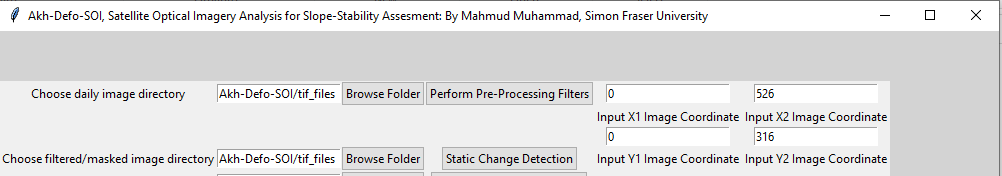

5. When step 4 processing is done a new folder called "filter_daily_images_classified" created that include the filtered images and now is ready for Static and Dynamic Chane detection

6.Browse to the folder "filter_daily_images_classified"

7. Click on Static Change detection and Wait till processing is finished. New Folder Created Called "ChangeDetection_Figs". This folder contains subfolders such as plots, gif-animation time-lapase and Geocoded tif files to be used in any GIS software

8.Click on Dynamic Change detection and Wait till processing is finished. New Folder Created Called "Results_OpticalFlow". This folder contains subfolders such as plots, gif-animation time-lapase and Geocoded tif files to be used in any GIS software.

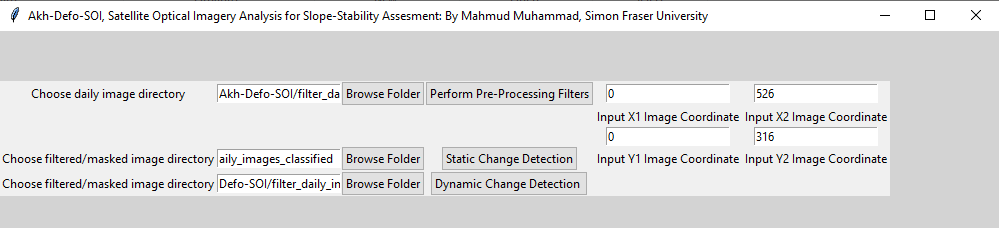

9. Now when Dynamic Change Detection processes is done restart the simple GUI program
10.Lastly, we can stack dynamic change detection to obtain average deformation rate for a longer period as follow:
using mouse Click choose the desired start date from the left side of the listbox triplets and click to choose the desired end date for the triplets to be stacked on the right side listbox. below the Stacked optical velocity Button enter number of days difference between the first triplet and the last triplet as the below figure then press stack button to get the results. 

For example we chose start triplet as 20170405-20170409-20170410 and end triplet as 20170501-20170514-20170516: Total number of days equal to difference of number of days between April 9th 2017 to May 16th 2017 which is equal to 41 days

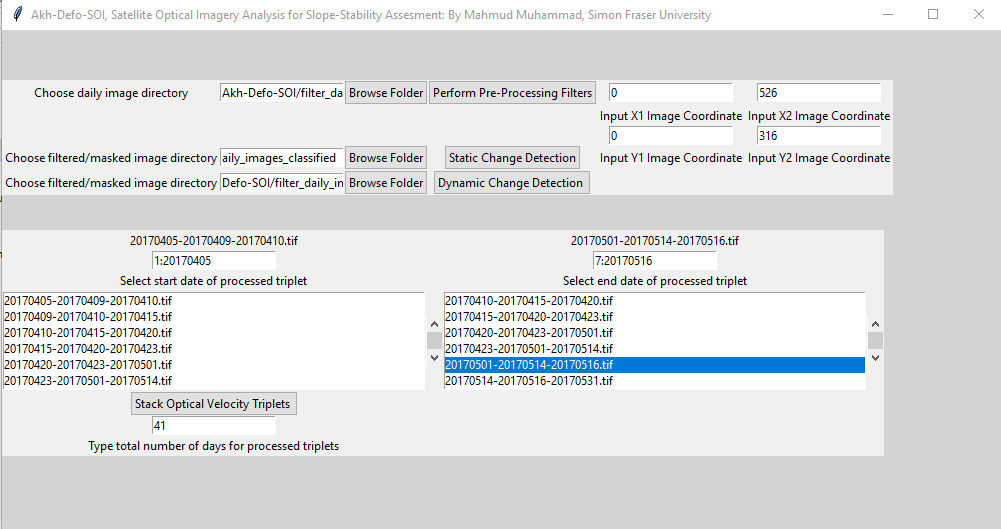

See Results below

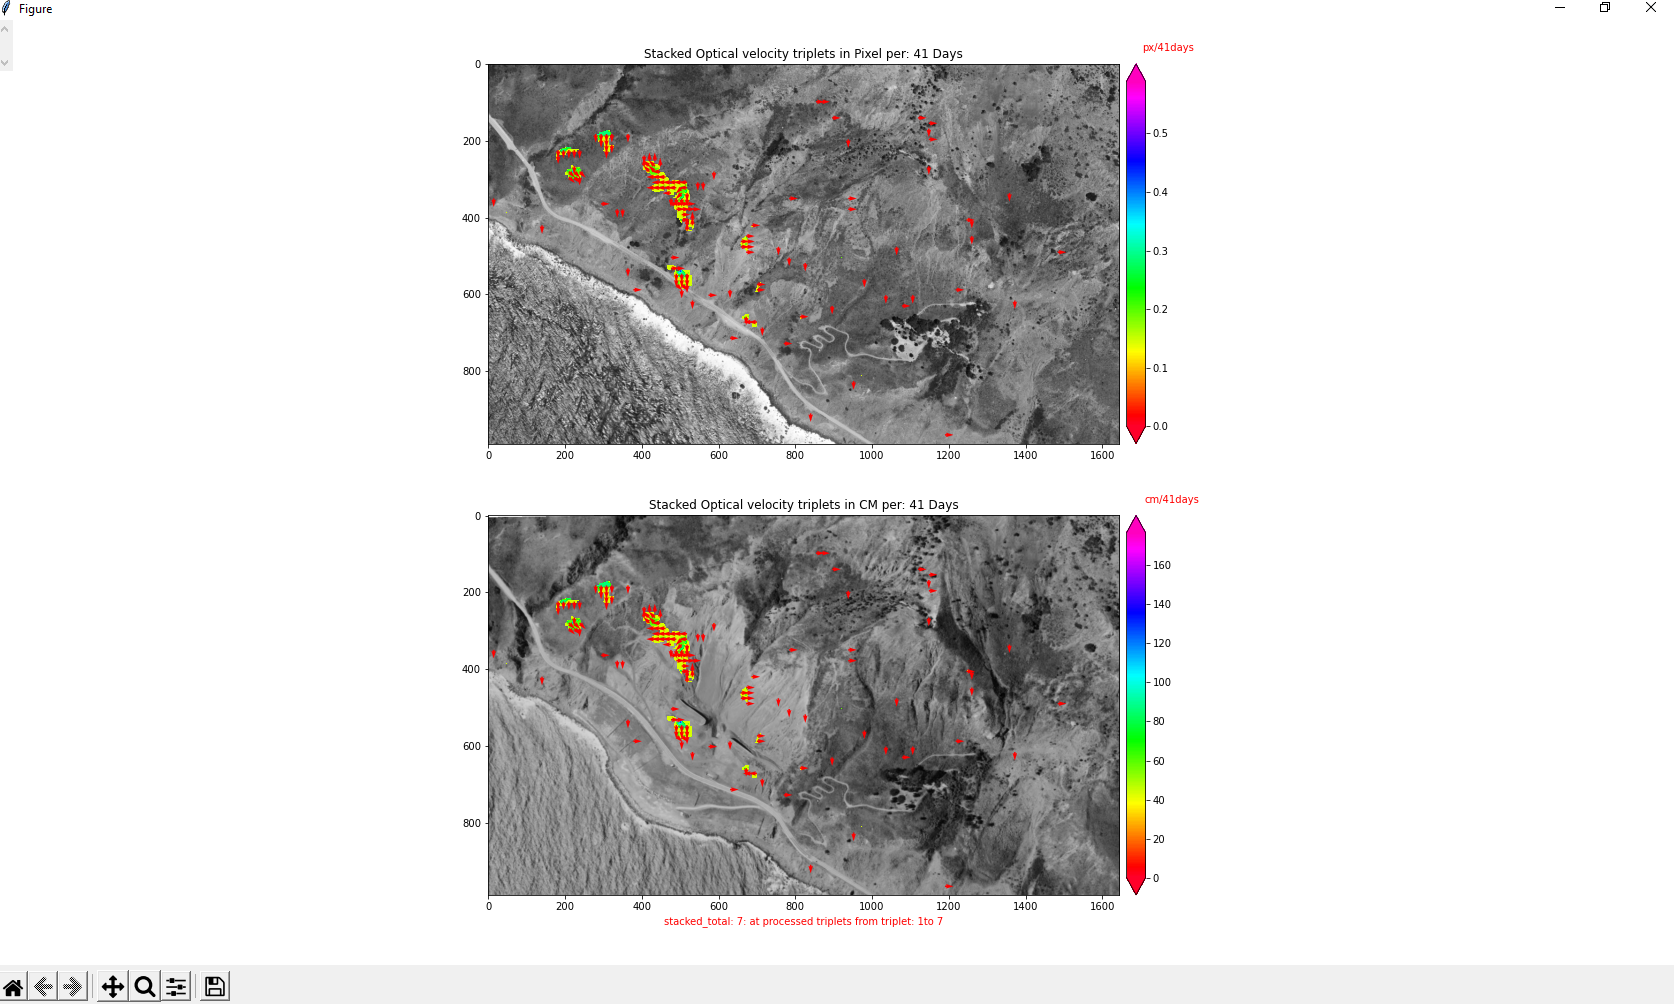


You selected item  0 20170405-20170409-20170410.tif
You selected item  6 20170501-20170514-20170516.tif


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Mahmud\anaconda3\envs\tf\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Mahmud\AppData\Local\Temp\ipykernel_36848\2093434642.py", line 110, in my_upd
    index = int(my_w.curselection()[0])
IndexError: tuple index out of range
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Mahmud\anaconda3\envs\tf\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Mahmud\AppData\Local\Temp\ipykernel_36848\2093434642.py", line 146, in my_upd2
    index = int(my_w.curselection()[0])
IndexError: tuple index out of range


You selected item  5 20170423-20170501-20170514.tif
You selected item  6 20170501-20170514-20170516.tif


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Mahmud\anaconda3\envs\tf\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Mahmud\AppData\Local\Temp\ipykernel_36848\2093434642.py", line 146, in my_upd2
    index = int(my_w.curselection()[0])
IndexError: tuple index out of range


You selected item  6 20170501-20170514-20170516.tif
You selected item  0 20170405-20170409-20170410.tif


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Mahmud\anaconda3\envs\tf\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Mahmud\AppData\Local\Temp\ipykernel_36848\2093434642.py", line 146, in my_upd2
    index = int(my_w.curselection()[0])
IndexError: tuple index out of range


You selected item  6 20170501-20170514-20170516.tif


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Mahmud\anaconda3\envs\tf\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Mahmud\AppData\Local\Temp\ipykernel_36848\2093434642.py", line 110, in my_upd
    index = int(my_w.curselection()[0])
IndexError: tuple index out of range


You selected item  0 20170405-20170409-20170410.tif


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Mahmud\anaconda3\envs\tf\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Mahmud\AppData\Local\Temp\ipykernel_36848\2093434642.py", line 146, in my_upd2
    index = int(my_w.curselection()[0])
IndexError: tuple index out of range


You selected item  6 20170501-20170514-20170516.tif


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Mahmud\anaconda3\envs\tf\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Mahmud\AppData\Local\Temp\ipykernel_36848\2093434642.py", line 110, in my_upd
    index = int(my_w.curselection()[0])
IndexError: tuple index out of range


Stacking image flowx folder started
plot stacked flowxn


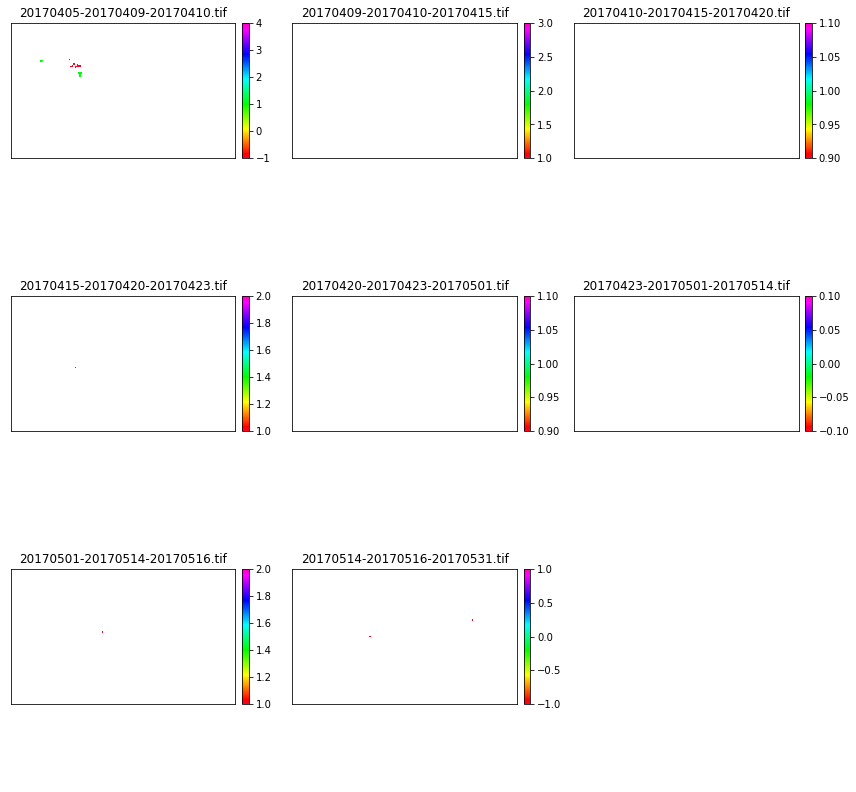

Stacking image flowy folder started
plot stacked flowy data


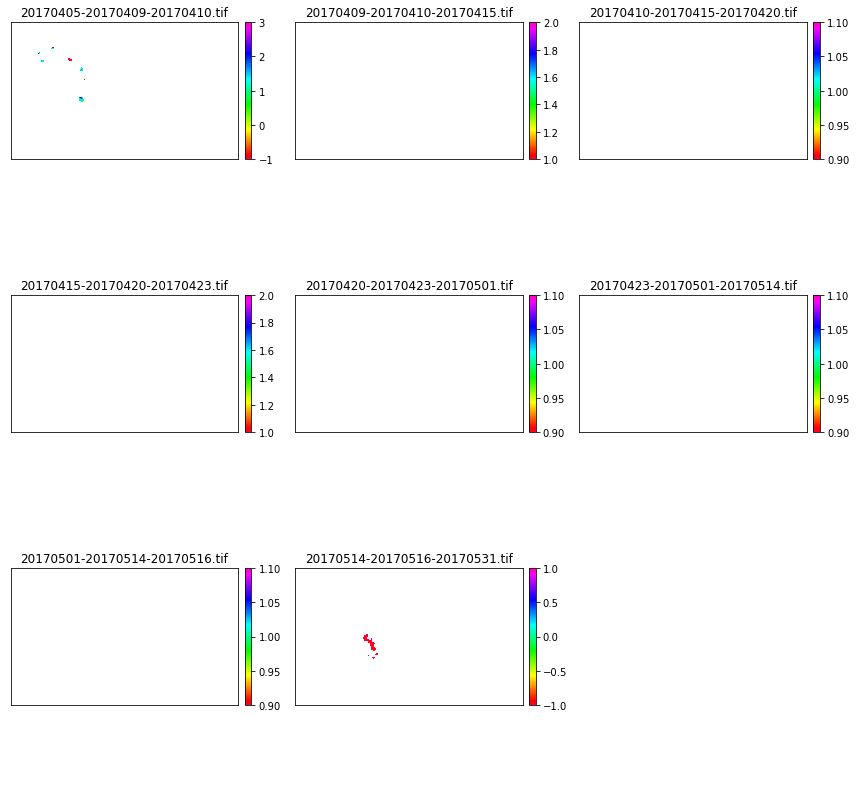

stacked optical velocity from: 20170405 to 20170516
No of Days 41
angle max radian 3.141592653589793
angle min radian -2.356194490192345
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32767.0, 'width': 1645, 'height': 989, 'count': 1, 'crs': CRS.from_epsg(32610), 'transform': Affine(1.0, 0.0, 641087.0,
       0.0, -1.0, 3970669.25)}


C:\Users\Mahmud\AppData\Local\Temp\ipykernel_36848\3973362954.py:1241: RuntimeWarning: invalid value encountered in true_divide
  u = u_/np.sqrt(u_ **2 + v_ **2);
C:\Users\Mahmud\AppData\Local\Temp\ipykernel_36848\3973362954.py:1242: RuntimeWarning: invalid value encountered in true_divide
  v = v_/np.sqrt(u_ **2 + v_ **2);


1 7
processed stack between pairs: 1 to  7
stacked_pairs ['20170405-20170409-20170410.tif', '20170409-20170410-20170415.tif', '20170410-20170415-20170420.tif', '20170415-20170420-20170423.tif', '20170420-20170423-20170501.tif', '20170423-20170501-20170514.tif', '20170501-20170514-20170516.tif']


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Mahmud\anaconda3\envs\tf\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Mahmud\AppData\Local\Temp\ipykernel_36848\3973362954.py", line 1406, in Stack
    canvas.configure(scrollregion=canvas.bbox("all"))
AttributeError: 'FigureCanvasTkAgg' object has no attribute 'configure'


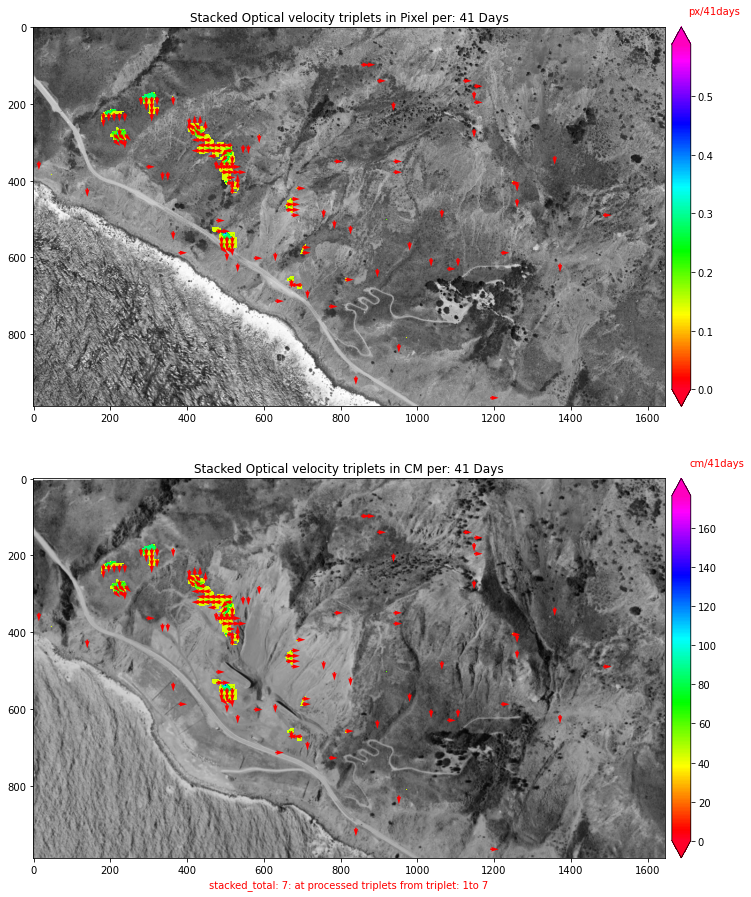

In [8]:
root = Tk()
root.config(bg='lightgray')
root.title("Akh-Defo-SOI, Satellite Optical Imagery Analysis for Slope-Stability Assesment: By Mahmud Muhammad, Simon Fraser University")
root.geometry("1000x500")

frame1 = Frame(root)
frame1.place(x = 0, y = 50) # Position of where you would place your listbox  Top Frame
folderPath = StringVar()
a = Label(frame1 ,text="Choose daily image directory")
a.grid(row=2, column=0)
E = Entry(frame1,textvariable=folderPath)
E.grid(row=2, column=8)
btnFind = ttk.Button(frame1, text="Browse Folder",command=getFolderPath)
btnFind.grid(row=2, column=10)

c = ttk.Button(frame1 ,text="Perform Pre-Processing Filters", command=doStuff)
c.grid(row=2, column=12)
   
########mask window input
w1=StringVar()

wx1=Entry(frame1, textvariable=w1)
wx1.grid(row=2, column=14) 
wx1_label = Label(frame1 ,text="Input X1 Image Coordinate")
wx1_label.grid(row=3, column=14)

w2=StringVar()

wx2=Entry(frame1, textvariable=w2)
wx2.grid(row=2, column=15) 
wx2_label = Label(frame1 ,text="Input X2 Image Coordinate")
wx2_label.grid(row=3, column=15)

h1=StringVar()

hy1=Entry(frame1, textvariable=h1)
hy1.grid(row=4, column=14) 
hy1_label = Label(frame1 ,text="Input Y1 Image Coordinate")
hy1_label.grid(row=5, column=14)

h2=StringVar()

hy2=Entry(frame1, textvariable=h2)
hy2.grid(row=4, column=15) 
hy2_label = Label(frame1 ,text="Input Y2 Image Coordinate")
hy2_label.grid(row=5, column=15)


##########33

a2 = Label(frame1 ,text="Choose filtered/masked image directory")
a2.grid(row=5, column=0)
E2 = Entry(frame1,textvariable=folderPath)
E2.grid(row=5, column=8)
btnFind2 = ttk.Button(frame1, text="Browse Folder",command=getFolderStaticChangeDetection)
btnFind2.grid(row=5, column=10)

c2 = ttk.Button(frame1 ,text="Static Change Detection", command=StaticChangeDetection)
c2.grid(row=5, column=12)


a3 = Label(frame1 ,text="Choose filtered/masked image directory")
a3.grid(row=8, column=0)
E3 = Entry(frame1,textvariable=folderPath)
E3.grid(row=8, column=8)
btnFind3 = ttk.Button(frame1, text="Browse Folder",command=getFolderPath_DynamicChangeDetection)
btnFind3.grid(row=8, column=10)

c3 = ttk.Button(frame1,text="Dynamic Change Detection ", command=DynamicChangeDetection)
c3.grid(row=8, column=12)

####Frame for Image Display
frame2 = Frame(root)
frame2.place(x = 1000, y = 0) # Position of where you would place your listbox


###########3

frame = Frame(root)
frame.place(x = 0, y = 200) # Position of where you would place your listbox


a5_start = Label(frame ,text="Select start date of processed triplet")
a5_start.grid(row=3, column=0)

a5_end = Label(frame ,text="Select end date of processed triplet")
a5_end.grid(row=3, column=10)

c5 = ttk.Button(frame ,text="Stack Optical Velocity Triplets ", command=Stack)
c5.grid(row=20, column=0)


#######33
glistxn = glob( "flow_yn/*.tif")
glistxn.sort(key=os.path.getmtime)
names = [os.path.basename(x) for x in glistxn]

lb = Listbox(frame, width=70, height=6)
lb.grid(row=5, column=0)
scrollbar = Scrollbar(frame, orient="vertical",command=lb.yview)
scrollbar.grid(row=5, column=1)

lb.config(yscrollcommand=scrollbar.set)
for names in (os.path.basename(x) for x in glistxn):
    lb.insert(END, (names))


def my_upd(my_widget):
    my_w = my_widget.widget
    index = int(my_w.curselection()[0])
    value1 = my_w.get(index)
   
    var=(index)
    var1.set(str(var+1)+ ":"+value1[:-22])  
    print ("You selected item ",index, value1)
    # use global variable
    global my_text
     
    # configure
    my_label1.config(text = value1)
    return value1
    
    ####
    

var1=StringVar()
 

textBoxst=Entry(frame, textvariable=var1)
textBoxst.grid(row=2, column=0)

my_label1=Label(frame,text='')
my_label1.grid(row=1, column=0)

lb2 = Listbox(frame, width=70, height=6)
lb2.grid(row=5, column=10)

scrollbar2 = Scrollbar(frame, orient="vertical",command=lb2.yview)
scrollbar2.grid(row=5, column=11)

lb2.config(yscrollcommand=scrollbar.set)
for names in (os.path.basename(x) for x in glistxn):
    lb2.insert(END, (names))
def my_upd2(my_widget):
    my_w = my_widget.widget
    index = int(my_w.curselection()[0])
    value2 = my_w.get(index)
    var=(index)
    var2.set(str(var+1)+ ":"+value2[18:-4])  
    print ("You selected item ",index, value2) 
     # use global variable
    global my_text
     
    # configure
    my_label2.config(text = value2)
    return value2

var2=StringVar()

textBoxend=Entry(frame, textvariable= var2)
textBoxend.grid(row=2, column=10)
my_label2=Label(frame,text='')
my_label2.grid(row=1, column=10)

lb.bind('<<ListboxSelect>>', my_upd)

lb2.bind('<<ListboxSelect>>', my_upd2)

var3=StringVar()

stacked_timetxt=Entry(frame, textvariable=var3)
stacked_timetxt.grid(row=30, column=0) 

stacktime_label = Label(frame ,text="Type total number of days for processed triplets")
stacktime_label.grid(row=35, column=0)
#####################################333333333333333333333333333333333333333333333333333



root.mainloop()